In [1]:
import base64
from PIL import Image
from io import BytesIO
data = "R0lGODlhPQBEAPeoAJosM//AwO/AwHVYZ/z595kzAP/s7P+goOXMv8+fhw/v739/f+8PD98fH/8mJl+fn/9ZWb8/PzWlwv///6wWGbImAPgTEMImIN9gUFCEm/gDALULDN8PAD6atYdCTX9gUNKlj8wZAKUsAOzZz+UMAOsJAP/Z2ccMDA8PD/95eX5NWvsJCOVNQPtfX/8zM8+QePLl38MGBr8JCP+zs9myn/8GBqwpAP/GxgwJCPny78lzYLgjAJ8vAP9fX/+MjMUcAN8zM/9wcM8ZGcATEL+QePdZWf/29uc/P9cmJu9MTDImIN+/r7+/vz8/P8VNQGNugV8AAF9fX8swMNgTAFlDOICAgPNSUnNWSMQ5MBAQEJE3QPIGAM9AQMqGcG9vb6MhJsEdGM8vLx8fH98AANIWAMuQeL8fABkTEPPQ0OM5OSYdGFl5jo+Pj/+pqcsTE78wMFNGQLYmID4dGPvd3UBAQJmTkP+8vH9QUK+vr8ZWSHpzcJMmILdwcLOGcHRQUHxwcK9PT9DQ0O/v70w5MLypoG8wKOuwsP/g4P/Q0IcwKEswKMl8aJ9fX2xjdOtGRs/Pz+Dg4GImIP8gIH0sKEAwKKmTiKZ8aB/f39Wsl+LFt8dgUE9PT5x5aHBwcP+AgP+WltdgYMyZfyywz78AAAAAAAD///8AAP9mZv///wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACH5BAEAAKgALAAAAAA9AEQAAAj/AFEJHEiwoMGDCBMqXMiwocAbBww4nEhxoYkUpzJGrMixogkfGUNqlNixJEIDB0SqHGmyJSojM1bKZOmyop0gM3Oe2liTISKMOoPy7GnwY9CjIYcSRYm0aVKSLmE6nfq05QycVLPuhDrxBlCtYJUqNAq2bNWEBj6ZXRuyxZyDRtqwnXvkhACDV+euTeJm1Ki7A73qNWtFiF+/gA95Gly2CJLDhwEHMOUAAuOpLYDEgBxZ4GRTlC1fDnpkM+fOqD6DDj1aZpITp0dtGCDhr+fVuCu3zlg49ijaokTZTo27uG7Gjn2P+hI8+PDPERoUB318bWbfAJ5sUNFcuGRTYUqV/3ogfXp1rWlMc6awJjiAAd2fm4ogXjz56aypOoIde4OE5u/F9x199dlXnnGiHZWEYbGpsAEA3QXYnHwEFliKAgswgJ8LPeiUXGwedCAKABACCN+EA1pYIIYaFlcDhytd51sGAJbo3onOpajiihlO92KHGaUXGwWjUBChjSPiWJuOO/LYIm4v1tXfE6J4gCSJEZ7YgRYUNrkji9P55sF/ogxw5ZkSqIDaZBV6aSGYq/lGZplndkckZ98xoICbTcIJGQAZcNmdmUc210hs35nCyJ58fgmIKX5RQGOZowxaZwYA+JaoKQwswGijBV4C6SiTUmpphMspJx9unX4KaimjDv9aaXOEBteBqmuuxgEHoLX6Kqx+yXqqBANsgCtit4FWQAEkrNbpq7HSOmtwag5w57GrmlJBASEU18ADjUYb3ADTinIttsgSB1oJFfA63bduimuqKB1keqwUhoCSK374wbujvOSu4QG6UvxBRydcpKsav++Ca6G8A6Pr1x2kVMyHwsVxUALDq/krnrhPSOzXG1lUTIoffqGR7Goi2MAxbv6O2kEG56I7CSlRsEFKFVyovDJoIRTg7sugNRDGqCJzJgcKE0ywc0ELm6KBCCJo8DIPFeCWNGcyqNFE06ToAfV0HBRgxsvLThHn1oddQMrXj5DyAQgjEHSAJMWZwS3HPxT/QMbabI/iBCliMLEJKX2EEkomBAUCxRi42VDADxyTYDVogV+wSChqmKxEKCDAYFDFj4OmwbY7bDGdBhtrnTQYOigeChUmc1K3QTnAUfEgGFgAWt88hKA6aCRIXhxnQ1yg3BCayK44EWdkUQcBByEQChFXfCB776aQsG0BIlQgQgE8qO26X1h8cEUep8ngRBnOy74E9QgRgEAC8SvOfQkh7FDBDmS43PmGoIiKUUEGkMEC/PJHgxw0xH74yx/3XnaYRJgMB8obxQW6kL9QYEJ0FIFgByfIL7/IQAlvQwEpnAC7DtLNJCKUoO/w45c44GwCXiAFB/OXAATQryUxdN4LfFiwgjCNYg+kYMIEFkCKDs6PKAIJouyGWMS1FSKJOMRB/BoIxYJIUXFUxNwoIkEKPAgCBZSQHQ1A2EWDfDEUVLyADj5AChSIQW6gu10bE/JG2VnCZGfo4R4d0sdQoBAHhPjhIB94v/wRoRKQWGRHgrhGSQJxCS+0pCZbEhAAOw=="
im = Image.open(BytesIO(base64.b64decode(data)))

In [8]:
import os
import cv2
import numpy as np
import argparse
import warnings
import time

from src.anti_spoof_predict import AntiSpoofPredict
from src.generate_patches import CropImage
from src.utility import parse_model_name
warnings.filterwarnings('ignore')


SAMPLE_IMAGE_PATH = "./images/sample/"


"""
def check_image(image):
    height, width, channel = image.shape
    if width/height != 3/4:
        print("Image is not appropriate!!!\nHeight/Width should be 4/3.")
        return False
    else:
        return True"""


def model_prediction(image, model_dir, device_id, threshold):
    model_test = AntiSpoofPredict(device_id)
    image_cropper = CropImage()
    #image = cv2.imread(SAMPLE_IMAGE_PATH + image_name)
    """result = check_image(image)
    if result is False:
        return"""
    image_bbox = model_test.get_bbox(image)
    prediction = np.zeros((1, 3))
    # sum the prediction from single model's result
    for model_name in os.listdir(model_dir):
        h_input, w_input, model_type, scale = parse_model_name(model_name)
        param = {
            "org_img": image,
            "bbox": image_bbox,
            "scale": scale,
            "out_w": w_input,
            "out_h": h_input,
            "crop": True,
        }
        if scale is None:
            param["crop"] = False
        img = image_cropper.crop(**param)
        start = time.time()
        prediction += model_test.predict(img, os.path.join(model_dir, model_name))

    # draw result of prediction
    #print(prediction)
    label = np.argmax(prediction)
    value = prediction[0][label]/2
    if label == 1 and value > threshold:
        #print("Image '{}' is Real Face. Score: {:.2f}.".format(image_name, value))
        result_text = "Real Score: {:.2f}".format(value)
        color = (0, 255, 0)
        label = 'real'
    else:
        #print("Image '{}' is Fake Face. Score: {:.2f}.".format(image_name, value))
        result_text = "Fake Score: {:.2f}".format(value)
        color = (0, 0, 255)
        label = 'fake'
    #print("Prediction cost {:.2f} s".format(test_speed))
    cv2.rectangle(
        image,
        (image_bbox[0], image_bbox[1]),
        (image_bbox[0] + image_bbox[2], image_bbox[1] + image_bbox[3]),
        color, 2)
    cv2.putText(
        image,
        result_text,
        (image_bbox[0], image_bbox[1] - 5),
        cv2.FONT_HERSHEY_COMPLEX, 1.0*image.shape[0]/1024, color)
    #print(prediction)
    #format_ = os.path.splitext(image_name)[-1]
    #result_image_name = image_name.replace(format_, "_result" + format_)
    #cv2.imwrite(SAMPLE_IMAGE_PATH + result_image_name, image)
    return image, label

d:\pyvenv\rapid\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import base64
import cv2
img = cv2.imread("chuareal.jpg")
retval, buffer = cv2.imencode('.jpg', img)
jpg_as_text = base64.b64encode(buffer)

In [9]:
import cv2
import numpy as np
import base64
from PIL import Image
from io import BytesIO

model_dir = 'resources/anti_spoof_models'
data = jpg_as_text

im = Image.open(BytesIO(base64.b64decode(data)))
img = np.array(im)
img, label = model_prediction(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),model_dir,0,0.0)
cv2.imshow("here",img)
cv2.waitKey(0)

-1

In [1]:
import requests
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import http.client
http.client._MAXLINE = 6553600

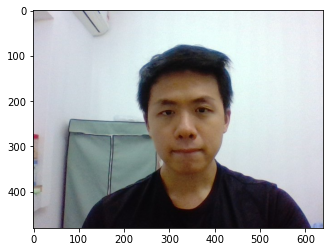

In [3]:
img = mpimg.imread('chuareal.jpg')
imgplot = plt.imshow(img)

In [ ]:
JSON = {'base': DATA}
#response = requests.post(BASE+TARGET, json = JSON)
response = requests.post('https://hazim78.pythonanywhere.com/process/1', json = JSON)
print(response.json())

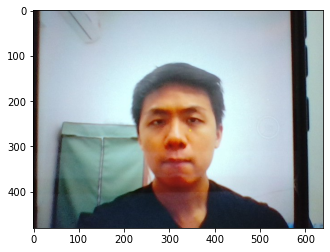

In [5]:
img = mpimg.imread('chuafake.jpg')
imgplot = plt.imshow(img)

In [6]:
#BASE = 'https://prodit12.pythonanywhere.com/'
#TARGET = 'process'
DATA = r'/9j/4AAQSkZJRgABAQEAYABgAAD/4TDKRXhpZgAATU0AKgAAAAgABAExAAIAAAALAAAQSodpAAQAAAABAAAQVoglAAQAAAABAAAgouocAAcAABAMAAAAPgAAAAAc6gAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAV2luZG93cyAxMAAAAAOQAwACAAAAFAAAIIySkQACAAAABDkzMgDqHAAHAAAQDAAAEIAAAAAAHOoAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADIwMjE6MDg6MDkgMTQ6MjQ6MjgAAAAAAeocAAcAABAMAAAgtAAAAAAc6gAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD86G68EZ6j2r1P4IIZPFFqhPLEDjqFzyfrnH515avDg4Jr1f4IgnxhZqhZTIVOSvChclhn3wBXPW20O+jLVn3x4dG6zhI4BUGujUA8Y6Vi6JGfs0WTn5R+FbsaD+Icc9K92jJ8iPmKnxMcVyh9ag8vJxjk+/WrYXgg9RTSnG444/StgiZFxafeI6e9UuFbnrW/JHmPkEsc9qoXNr8vyjaazmrnSpFLl/YGsnX9LN9bsVyJF+7kdTW0mF3AjmldcrjGSP1rEmfkc54b1gMTZTnZdISNh6nBOf6V1UB7HjccZzXJeINJcSJewEpLGD/D94elbXh3VotWt1kBKsOGB7GqVjF9zYaMhsklhU8QyOMg+tOQHAxjBqZItuTyA3YVQolyylVkwTyvFWtueAMsOprBvI3RhJE7KV5Poa29LuVvIlIbDng/Wptc6Ex4jwRk5z2qndWuexI71rhDxjvTZLc7TkDLetQ72L5jGjhCgnBHpUiRk8Yxxmrogbd0+UCnrbtwWIyRjpWPKKUivFDgYYE5/SpkjwuMYOKnWE8gj5fWpo4iV4wRVpHPJ3I1gJ24GBj86sLbvyMZFSRwFvQ7eKsLCcrhjnvxV+hkR29tnqOO3NShD0xz9anFsV4Pc9Qaf9mzzngAAVoo3LTIVixgkZ/GpPJzjaMnrU8MXHUj6VJ5W0cDk96rkY7lUW59Ru9M0qxluoGenNXBFwS2KcbccZ5o5AKgt9pz29M08xntjBqfycYAz7U8QE8itUZOxV8s4NCxfXpVow5BBGTSJCF6g47ChxuUmQeTkdeaeYRgc89qn8r2/CpBCMjipsBTFuQ2B09ad5PY5z2q41vt5H5U4whvUmiwyn5QGeefak8gBM88nHBq75GD04pwtlBPGfTPejlLuUvKCnBBpvkBGPHWr/lYHTJHWnGHOMrS5Q5mUBGBxx70m0KxwOevWrZiBb5V6etBi54A59aLAVCRu7kioyAzEcmrxhGScUnkj0xTFqUTHzyDx3xSeX0IB59e1XWjOcjk+lAjOOn0z60CZntEVGTyelDKegA/OrpU+bzjHtSGP0HXrxU8orlBoyvPOV9O9HlsVJ9e1XWg9MD+lM2cdOtVqSU3Q7enPvUTIynnH51oSp8oA6n3qMpwMYPrRYtaFPySBnGSaaYm7jHvVwplQMdTQMBcEHNZuCLUmZzx8dOaYY3I55q6wC54/HFNZdo4HHr7VHKXzFDyTyScVG8JPHIxV51BIBz7Go24/Ch3HzFBrcjv3pjWoPXINXj096jPcEAn+VRyl85nG1wx5JAqFrfgn+taTqMEYwaryJjBPU/rS5Re0M2W1I4Gef0qvLanAGcnrmtSWPdnjBPvVdkPfOO1PluHOZrWgPTIPXmoXt++eM9M8itTyfmPHamMhIYEYJ4P/wBanyoOYz/s2W5+uMVXktfk7lutagTLYPJxxnvTJEIOBwO/sabikO7OR8SWCvpd4uTzCwP4g1+WniKPyNVvIjx5czpn6MRX6veIIgbG6yQwaNs4+lflR4uTZ4k1NDkkXcucjkfO3/6682t8Z62Gk1TkjOC/uuDnIqin3zknHtV8D9xgE/TFURgMeKFsZnV+EfmuJlAG7yywJOBgHnn8RX6B/sFXn2z4aXu/5fLv5VAz93kHH5k1+fPgva17OACxMDr+dfef/BPiX/i3+txE526nJjHYHb1r0aD9ySPPxV1G59cAbgCOue5pu32JpQNtJgKnBz71yNHFGXVkTjdnsaiPDHIznpUrKG2/570z+LHbJPvUmt7n4lcpyTnNes/A2cjxNEBkouGIx3BGP515OzHcOmfpXpnwbRj4msSWC7bmNiPVfT+lc1bY+iw+79D9EdB2/Y7cIdwCKOuSeOtbqE4zg8Vx/hW9MdnCGZdrAE47cV2cX7xNwYFeMCvZov3Uj5uovfZJ5fbJ6cml2BeM5z1BpyA+uOw4p/lkck56mugSISgAJXdioZoPmHJAOauDB5BAC9uuaayYyMeoqWaGJeWm055JqFVHrW21qHDA5yeRms2a2MJ5BI78Vm4om5V8oOuDzuPeuTvrOTw3qv2+DcLeQgTR9iB6fnXaptc+v1qO6tFuEKONytkHIzxSaMuazuS6bfJf2qTICVYZB9R61prH5gyOcYFcFpcr+FtV+zSbjaSn5W545x3/AMa9AtSGAxzkZ4qdepfLrdbAIs5QjKkcVWhLaXfKwH7pjz7VpLHgHinPbidADyPX0qk7Fx3uaMZDIrr3Hakk4GT+PFJp6iKIDnAP51Ncf6tsDik2aFSKQTE46qfSrAj2k9xVLTZhI7ZGMH8a10jBPXIrIUlykXlHGB1+tTxLsbcOMipBbjAOPxNSxoPTNXZnMxIYycnsKnRO2O+ackZxyMHrxU8aevBrSMSBmzII4+lOVccGpfL6YFShcYIHWtSkRCMrkYFPKfMOMGphGAehJp+zOODmmURBcdgSaBkjjgg4OamKH04+lOSMliQOB+lOwmyERggZP/1qdsy3bHv3qfyh1xk+lKkIJ9MUWMmQGI/j3pfLHWrWzLcjn19aTHcAdelGoFfYP9kZp6xkckHH1qZY923gf4U/ZjjGaYyER5ySO350vlg4Pb0qbblhnAFP8vGfb9aVh3KuC3OakCnHTiphDhSe9SBMpgikBT8vGc5xml8snjPNWvLzwBgU3bgk8j+tBVyu0Y69O1II/UYJqdoj3z707YcE4z70BzFUoD26Ubcr2yfarOzqO/8AOk28HIxigdyq0fOQCfpTDCD6+tXHjJ6cDPam+UPfn9KAuUSnB+7TSnOSMCrpiHTGab5WSc5H4UCKbc8DNRYPQ5q8Y93XsaicAMMCgCqYx0wCe9RlOozkZq75YxnHIqMx/KcAHmgCtt/LpUcicjBycZNWzF8ucj86jKBe2adwKjJgEg1Gyj6irgQ7jk4470xogzEcY+tTYZRZAcccjjioTH8zAcg1oPCeMdKgeMjjqc88UuULlJozuyKZIv4VdYdScqPp0qFkwxAyc96llFKRM5A/PFRSREqSeSK0DGduCc96rtARnhSDye4qLDsUSmSc9SaieLPUEj61edPwHsaikXHy4x9aRSTKTQ9Sc46e1M8s/LgHirrRDK89enFI8JA9+2aRoosoBcjJGMfpUbxlg2ck9sjqKveVgnJzn9KSSP5cg/pUtnRGBzOtxgwS4HG1uPwNflF46R4vFesKwyVu5Px+c1+s2sR/uZRjqpx+VflJ8TIDD431xSG/4/ZsA9hvOK86t/ER6eHj+7lY58E+Vx6VR48w5FXUyIF4wKpSD94Tz1pGB0fg+YwXxdASwUkDs1fdP/BPQmPwr4igbClb8k5P3gQMfpXwp4TQtqKKG2lgygepwcCvuH/gnt8uj+KlJJ/00AZ/hAUcfnmvQoLRnmYx+4faBwo6cnnNJxj27inKMgEnPH60j52jpmudnHHVEWeenTPSoj82T0NTNnv3FM/TOfwpGx+JO7LqTgAenevVfg1CLjxNZrjlmByR2GSR7cV5VGDuAJI55r2f4AwlvEtqiMN3JKnHzEHg/lmuOu7JH0uH3fofbGjwu0EWAwIVc54ycda7LSBKoAYHDday9JjDRxkAYAAz68V09rGFXjoecY7V6dFu1zxKqTbH7CWyAcDvinCMng/Mc/Sp9hwSAfTFLs5znB+tdtznSRDtH3dpVvpRsxJz93nmp8Ec5BNNOSeRkdTUlNEJj6NkdM9aSaAOuTz/AEqYAcYHIHWn+X1ByAetMxkYM1sYpOE4Pf1pY4yexJJ6Ctia3BPI5x1qlJC0bZGSKTMjK1jR49Ts3Qrlipxz0NUfCupS2U50+8bJX5Y5Hxk+1dPDHuBPH41ieJNA+1x+dAqJOvO7b1/Gs5K+xtB20Z1EPv3qcIAARnB7Vz/hbXBqcCRSgi6jGGBPXHeumVNx544qdTWwRADHtVqRfNjI4yfaoViI+XOSTxViJf72f8KLj1MuyszDdtkEKe/rW3Gg6n0pghyx44bmrcMIOeoqYqw6j5tWIFLZwD7VNHGdvPB9uKcsONoywqeOP1xmuhXOVjAhyM5OB3qbyzwM5xUiLu6/WpQnBwCfrVozGLGQTT9ufz6U/wAvHQYqYL6Dn1qxkIHfH51MkY+hbrTlQnrxnrUoQD+lFihhUdecDigADjgZ/KpvL3devel8oYHHv0qQINh54INSCM46VKqfN0PNP2EDPUUGZBs4z69qTycjr948YqyuMnsTS7Dn6fpQIgCk5x2pwjJHP4VLty3OMU7ywxHANAEJTp1z607yjx6ipgnI46frT1Qn8KBFfYckdj6etL5e0ZxjtVnyidxPH1pduQuR/wDXoKKgj9OAKd5YODxxU+3Pt60bD+FAyuY9zdOnWjy+3IHtU+wZHB5ox1GO9ILog8vGehNHljH86sunXjH40wRcHrkGlcorMg9eKaUzjJx/WrZTqCBUWwbsYwFouMrGHk8Z4/KkKk7s4+tWjCG6k8GmmMdOo96YFTyuM8g+9RNCOeBmrzIOhz9RURhIPJOOadwKYXAPSmsu41bKYJFNZOQR1PelcCs0YHYFjUDRjnAxn371e27ifWmGIZI4oKsUTHyAT2qNojnPAAOKueWNwBzTGi5J7fSgrlKbRluoFMkj69+fxq6YyATkYqEp3xk9u1AcpSaM4JAFMWPO7AbmrnlkDkHmo/LyTgdsfWpY1Ep+V3A4FRPDgfrV50IBXjr2qJ49qnnPtWbNEjOMQ/iGSKZImCTgZNXnXBGBwcdqhePL45wDWbZvGLKZhJwPWmuncgkmrr5I7DHSonG8YPUVJokUWQ5IxkU11CqByfrVtk+Y9MGq0x+U88+1BRz+rrujkyDwrD9DX5WfGNSnxJ8UZGD9udQAOOO9fqzqhKo5J52kc/Q1+VfxuQw/FHxGnGBeyBRjnGcgn864K695Hdhpe7NHFpkQYA4P6VSb5pCfQ8Vfiz5OMkAnqaz2wshHDUvUxN/wk5GpIQVDAEgv04r7d/4J6GUf8Jgjhd/2pWwhyPunn6Hgj618QeFZPK1SEsAygn5fXg8V9qf8E9HEV94yg4GZ43+mV4/lXoYd6M83FxXLdn3ImDz0zyKGXqT8wPoc0ifdGAMYpeTzgY6Vyu5xxbsQyZCnv+FMwMY6mnnr1IPpimE468mkaH4iD/WKT+Fe5/s4wiXxlbOuQCpLED73B4/D+teIRqFcEgHmvd/2cFMniuIqAFTazbfRiV5/SuOv0PqMMrqT8j7v0iP92pHJJ/KujgU598d+9Y2lkBFGOTXQwAYz0PqBXs0/hR89UvzMkGWznPSlVR15GfWlyei8gcZp4655rYSGbBjNLtxz/DipewI60FTycfpT1BkYQY7Cl2jpwCeaftyc559MVIkeQBg5Gfr1o1MGQlAXByNoqOW3Eij1HWrflD61IEHTP4UtTOxi+QFbHIxUghDDbwQRWhc2uVOeo6YquqEcEYx/Ks3dFrscnrelz6bdLqNkCGQfMB39/wAq6rSL+PULdJkJbsdw6GpDAJAwOTu/WubeN/DOpCRVZrSQ4YD+E0mzojtY7NQG9jU0alev/wCuoba4SdFkQ/KwyKmMnG4fNzijQHdFoL8oOAKsxruUYOKq2pZieCfStONFHbH+NXEyk7CIncnk09Iz1wMVJtOc+tPCFeeOfWt0YvUVIiRknmplX5iTjj2pyAjjGSKlC564qjMYoycEZJp4UDGMnP6VMqZU56GnBRkA0FKw1YgcHnPvS45x2qRVBb8ak2jjgZzSGRKDnmpNhPbinhT3HFP2njrSAjEROcdRTgu4kAA4qcflmkxg9OlBLIdmCMD9KdtBweanC5weD6ijaepzQTcg8rcTxk07yv8AOasMAAPT1xTgmMDBwenrU3C5X2e3404LyP1qYIOlOSMDsT+NFwuQsgPYijycjqBipiDg9xn8qcyhQCRk+9ArlcLjjGf60eWc4qyybsH/APWKNp6Hp70XHcqtGCMZxR5Z9sD261O0Y7DijZu6gjd/OlcZXYAt0xSbMFj61OyHOMcUqx9+KCrlXb0Pc8Yo2nqV/GrDpluBximtz3oKTKrfmT2xSMuR09sVYKenWk4xz1oGVWiJQ9jjAzSeXtJ46VaMYPrUZQbTkDPvTAqsh7AepqPyjkirRGc5HWk2jJAHFBRW2HPIBFQsmcEgrk8VdaIYPvUTpt55pFFUpznaeKYQc9P/AK9WmQE5OP8ACo2H6UGhVaMde2Kh8sE9DxVt8LxzzUTKWB680DICoz0Jz/Oo2jFWWAGelNx83WgdiqU68HrVd1IJxgj2q8y8kE55qCT0PbioLRT2ew/+tULruPQ5z0q03Hbio2UNyeCf51HKa3KZTtjHpUEnDHI/Grjr83cioJAATwT2Az1pcpVyqw3NzyetVpIwCTnPrV2RMNjGOOagkAbOQAKLEtnPamB5bc8dM1+W/wC0LbGD4veJVB+U3G4n8Aa/VDU4f3fAB55r8t/2jbcw/F/xAfMMhabP05OB+QrixGjR24XVSPOIx+4wpOCaoP8AJNz2rQjJ8s4JBqhID5hz1rFXDQ2vCxT+1YmIJC5PTocV9p/8E+42bXfGJxhA0QUjnPyn/D9a+KfDGF1uzUuqo8gDO3Qemfx/nX6Q/sZfDefwr4d1TVLlPLk1KZXUBdvygDt+dd9G1jgxWsGj6bHTGCM98UrcdcHNC/Qk9PSk+8SPT271hI4IvQifgDGBnP4VH12jnK8/Wpiw5PWo2UHGCcHkVOhZ+I6Y3AfN/Svf/wBmSNZPE3XZkdF6EcHJ/EV8+gDdznrzX0T+y3GR4qyF5XaOe4yK5K62PqMPfll6H3jpUfyR9s/nW7bqFxu7+orM0mH92CDzjvW1EDhS3JHcCvZp35UfPy1bDPTgYNOVR15PH5U5QCc46HIBp6A7f979a1QgSPd1GfrSsDnA6HmlB2DJ5I/QU5VO7IyfrTIkNCc843fzqRUwODz7dqNhyCTxmpvLDk8ZNMwkxEiBzgk49TSiEDoCM+tSRxnPT/61TKN1OxBVMPXPBNQy2o2Z6N7itZIRtA5+ppkkJbsD2FQ4loxN6RcNj1psrwXCFCAwb7wYdfrWjLpaSk5B9M0sWhRcZwxHfPJrFpo6Y2M+2RLddsR+XPTtWjb2rzNluKuw6WkfAHJPOa0I4B0wfmoSZUiGGAx4IAwOtWkjGM81II9rY4x396lGB1Xp6VstDnkMEY5xnnp7VMqkL3JpVjDKSD+dTqgXjGDVmQ1APQYPepFXkHAB9hT1QHg8GpkQ88f/AF6ZmRKPlPUDtT1H1/GpcdOAcCn4BAzgZoGNWMqx7ipPKHB5z9KesfTkn1p6qOeR/Oky7kfTp/KnBehA9qkwG9QaevXHApXIZCsfHXGKdsy2OM1KsY5HBPqakEf50yCHyfTp/OgLwM8/WrKx56jHpSeXnvilqIi2jHY+vtTgq+/FT+UW96FXtjJ6UCK5UHOAME9alx0wBg/zqXy+cDGCKURjkDNINivtwSBz+NOI3dSAKm2jOMYpfLDdBQIr7QOnalfqCRjirO3BGRzUZhI3ZC9exoHcr7OMkcmkVXBGOKteRkjP6mlMWGGAGH16UBcrmM5LHn8ajCg54+8e1WME8dRTWjPPynFBdyDn/PamlOSSBg1Y2A5yBx2pNpIwAuDQMruoxx271G69wODVnYemMgUhTqc/N7UDTK+zPrULrnqMetWmTJBHU9aYQMngZ60FFYrt603aOmM96sNHx0z3phBxg9+tBXMQsnboRUOwgjHT3q3tAHHT+tROvJx355oLKzLkkgVER8vt1qyV28dajZfc4oLuVWTB6nNRvH8xOcZ9RVtgOTntUDKM4J4oLTImTIJzxUbDgAZHFTt8jEAZBpjD1PagdyocqeailHDD1FW9xU5OeTVaRTnk8bqZRWYk+39arsSrev8ASrTrz2wKrzDgmpsO5A/Qf41C2B61Z28HPGeQagdDgDqKkXMVJItx685/So3TnnBz6HpVnoR19/amSD5mxyCKViWzE1GMEMADmvy7/abiEfxk19eclw3seP8A6wr9StQjHzDIJPf0r8yP2s0ZPjLq2VUARx4IHJBGefxzXBiejPRwX2/Q8ajU+USDyDVCbPnZOavxkeWecetUph+8PrmsStzT0R1jv7UnBHmoCM9eRX7K/DNYx4O0kAhttvHyONx2jmvxn0vBvLcBhuMigZ78iv1v+AXjuw8VeCdOhg3i5t4UWWN1xjgV3U03TbR5WMk1KOp6sRzxzmk6E846mhWGMAbSOlB3EZB6+1c5zpkPmEEAE80gb8ByQKVsnrnrUYOABk5HT6UWLPxHRl3YPIr6U/ZVt/M8RGYjcQwQY/PFfNce5pAO9fTX7KWH8SCIFxGYVlYdgwbAH15/Q1xV3sfVYV2hP0PvDSlBUZATvz6Vr4+U5FZ2mx4XsAOw+ta6KdvTpXtU9kfPS3uNHQ5NKM5HJIPQ+lSL97PPSnDAGTgjFa2JI1T5xUwQZz0Y0ina/AzzjHvUjfNwACR+dMhjQpUYJ5+lPj9QAMGngEbTwSPXrUuzvxn2qkYyAdgc1KExg5OelCjB7Y9MVKFHGB+dMjlBQG4PGKkCfMN3TpQq/dJznrUyAA9M55pWLSGLGDjoRUkcfYjjtUka88AZx+dShN3bFKxqiNUHB54qwuSowMUix9OoJOKm27RwMmgdxq59O9OC9M/rSop5HvUgiwAc0yGORNwBySO1P25xnLGnKrLggVMo7gAHrmgyGeWOveplQ5p+zpnn+tSRx7jnGDSuQM2jdk8Z6mnmIg9jn26VKIzxUnA9aZNhojGz3xyPWl8sBcY6VMkR7CpRGD0wMUDKxTJHXHepNnAxgmrIQY/vZpCvUAj8aWgmRxxg84xzTtm7t+VTIpGAQDin42+2KCSLbu7cEcinLF74NTqo6leKVV6nIIHT3pEkC5z904pzJjlQBnipdpI7Cl8snGcH2oEQCNsDjOPWlMeeQMjvzU/l5HC4NK0WQDjNSMgCbsD1qRY8cgZI71IYsMDjn9KNhY+nrVE3IsbiScZ7Gmlc8fnxU20q3QjNIU254wT3oEQBTj1xmk2Ec46/yqYxjgAE5p5UgE9xxQMqbASKDkD0Bqw8Qz6jPXvTdu4cZyOtA7lUp3HPPWlK/KAAD2qZoyc+vNNCY4I6/nTHcqsmQQM5+lMwEb6579KtFSCe2T1xTGUblAHI55oLuQFPl7ZP51C0Z3AdatNGd64G4DnrURXk4zmkUmQ7exycdM1EwHvVh4xxgHIpjJwDigsh28dePWonTIxnpzmrJQLnGATUWwnqOlMq5XdAM56EVEYxweT7VYbd369qaAfmwP8A61I0TKzLjtmoXBJHFWnU9Tz3xUTgZHqfSgq5WPTGCCPU1GVyOcYPpVllPPr7monjwOTmgpMrOCDxnmoZF+hzyeKtMvGM+9QSKMZ4NNbiuVSuMk96gKgLn8hVp1YruwMH+dQOo64OaYXK+zdnI6c9Kg24JwARnr61cdcH2Pv1qIx546AUmhlR4zk4GAajKnGR2PNWzwwOCPbFRyJ8pHY1LGY93hRggsTxx3r8yP2wIvK+Meo4P3oo2Y/hx/Wv0/u0O08D5R3r8zv2y7YQ/F+6c4/eW8Zx6YJFeZinblPTwW8k+x4FEvysexNVLn/WdfpV6JhtIzwTVC6PznpgHg1ncehe0NxFqFsxGdrqffrX2j+xh4ruT8Ub7SGdjG1iXAY9SHA/ka+KdLIF3A5wcSJnPYZAP6Zr6q/Y8uSv7QCjLbZLGTaSMblyuDXo4eTs4nm4yPMr9j9HoSXVc8gfxGnnOOtR2vKfLyp5qTBYEdARXJLRnDF3RFIMnpn8ajVyCRjtnrT5M9McHrTADzjJNI2PxFjXBJzX1X+ydCDqKgFZFAjIIHPOev8AhXypb5EmCDivq/8AZKST+1RGVVIy+4AcngBhn1Jyw/CuGvvFH1GH+CfofcumRFIhnsuPx/8A11sIOFALDA61l6bkoCCWXGcZrUi+ZM9CTyPSvbhsfPSvcXaQNuCOOTnrSgDB54/nTkI6kbhSkZ59egB7VoRcNp29Og5FSIMPkZ9qATkA4PrUqjDE4ODV3Jkxwh2tyQc1IiZAzkUqg89z/KplXK9ea0MmIsfXnjvT0XpgU5AD2A96mVCCMjrQK43yjUkSAnntT0QseP0FSqPnyak0QiIRxwc9KkVAvB6ipFHXHWpNnI6f40ixoXkU7YSQcYqVVJXkVIqjjAxQSyLyz1B6U/ZnAPX271MUBz6ZqZY+wxQQyNQR0Gc1LGmBzQFwRkGrAHy4xyOaDIaUGCDzUqAcdcnrTgp4xwRznFTY5OTn8aRNyNQOoBHpUvlAEZHXk05V355wBzk1MozjOKNAuRqh5LHFS4A5A681KkWGz1707bnJI4HQjtSBkaxjoTx2qVYhx93jmpdox0wCOacsZ44+pxQZshVOvcnk05YxkZI556VYZBuXjjHPFKYhxjoD0pXJuyBo8EDnjj60/wAr5ehOe1WBH8uT1/nSFOhB70rhcrLF8xBHGPWpFj3NknB6c1KFAI5yDTzj0xnqaLiZDtxyeh/WkZPm4PHpVgrnHPANKIhy3HuaLk3Ilj4J4pmw+xI71ORjGOM+tNGRuOcjvSEQGM8AevPFNc7nJ5I+lWcndzwCcUmwO3B6UAVmVi3HGaXyzyCSCanCngdKd5QBJbJI7Uy0U/KPYcDuaci7Rgjr3p8uQSASOemKcF+UE4P1pAVXj6lh24A5qFlJcHoP1q40TNgjPPv2pCgJOccDHNUhbFRoyoHOf51Hs785OOe1W2XaB/WmmIMB7c5qxplUx9T6VCV69x6+lXNp5GARTPKwc889RSNFIqbCajZTjnk1aKElcYx1+tR42npgGkaJorFOf/rVE/fB5FWiPX+dRMijJODn170FXK3lnHOTmoWAPGD19elXXUhQVwR0qJ13dsHvQNMquhPuaheP25FXMcd+O9RFeTnv3pXNEVSMDkHIqIqSMdC386tMDk+5zTGXGcmi4yk6EcDrUZUbcYzxVt1A5zmoipxx92mMzzGDjsKiZeScGrsqkdOnrUDDtn8cUxlfyw2eOaiMZyc7fqas896Yy7uucNQUiq4OeuR0zUUi4HGGqx5XryPemSL/AN8gUmaJGRfKSnJxX5qfts/L8YOUCsbUDPtuJ/r+lfpjeR5P61+bP7cgDfFaAhcbbXDcercV5eM6Hq4HeXofOCfLGQTnmqF0B5h5yKur90+n9apXK/vBkisUTJalrTzuuIQBjLKpI7ZNfS37I9wo/aH0/Yy7XsZdu3+EApx7/wD16+ZrDP2mLBA+cH9a+j/2Vpy37QuhybQha1lQEDA7GvQw+pwYl+4z9OodvljDDg/lT3/hwTnGeKigA8vAPTt7VPy4GDyKwnfmZ5kNiJzu/Eck1CJD0xjjj3qVhuGOgqFM5AAP1qNzdWPxKtfmmBxyv86+tf2RyTqnJ3Myq2enzZP65BH0r5KgO2Veeh/Ovrz9kOMrKquCrSSs6kcg4IAB9OAT+FcVb4on1WHt7OZ9t6b9wLjgcD2rUXqDg46ZqhZ5bHRc8mtJVPGOVFe1HRHz0tGJzt5JDevapIs/dIyKdnocn8KeM7sdsd62RkwCjOOMVLGMZP8Ak0bd3HAxUi/w5xkVqYtiop5ODyOOanRSvBpoQ9T9RU6jcAc9fWnYQIBnODiriqNoJHOeKij6kE9amVT15FSAoTHPGT0qWNNuflIyaRUAIwT9T2qYLngk+1BaEjQsepxUsY4HX6mhYyOnNToh3HOfagdxo545qRVHQ5GakVNqg96dt749s0rCY3B3dKmRMgdjRs2gZ6Z61IkYYDgnnikZsFjGOO1SpGF54z7UscHHTr+tTIMDBx16UjJsETH9496m2+wBpEyM8e3FSiMOw4we+aCbiKoCknr9Kmjj4HOSeelPUZxx04Jp4UjnqFoExqKu5eCT3qYKGGOeBT4xlG5I9PWpVjK9VG6k7AM2cDqKeAMe/wDOpBG2c9OvFSqu3JHPHNTcRXWIY5B5pwiy2R19KmGTkdM9OKVVwc/xGlckZ5WeSMenrSKqspA4/GpsNnrmsrWbiWygd0xvUE8mn6AzQVfYjHemySL1+73ry/UPj1pOkLLDexyC8iypUDIY/hXkvjH9oTU9T3pp2bSJuAT94j+lWo92LklJ6I+jNX8Y6Vowb7Zdx22P7zVxGrftF+FtN3RrdCdug2V8j+IPEF3qkrPd3ckzNydzd65i4vTk4faPak2lsdKw/dn19c/tN6M8bkt5GPqTWDeftWWNuxENvJcD1ZRj86+T3uSz/wCtP51XlaRgf3nHp601Jdh/Vo9z6tb9riJcAaexOMlcj9K09O/a2sdyCfSJhnqQ6kj9a+PI3m2k7vu9ialTUJrZk38j603NFPDRPvnw7+0N4U150j+0PaStgbbhcYP16V6LaalBqEayW0qShgCNpyDX5pW+vgkA8AdMjpXofgv4u6z4SdW0+/cRA/6iUl0P4Z4ovF9DN4V2vFn3ntBJ6cn8qUx7QcYNeAeE/wBqKG7KLrNotqW4MsRJGf1r2HQPG+keJYlksr2KZj/CDz+tHJ2OWSlDdG40e3/9XSoNjHnjHarB+f5gTk8/SkVN3VhtNQTzFfy+2OB39aYwGeAAKtbORweegNRNHubOP500Mg6Z4BGelRlCCSMYxVpl5IbHNRMCSCT0plpkATdzg5HrUbpleR9KtNg9jz6VHgnIzyvrQVcrSALHjjnvVYr82OMCrxXqCB7moCuOeCenNBZUdd2CeB9KiZecd81bdOcDJqIoN2evrQaIrsucYHTtUbrg9MZq2UJ781CVOAeDmg0KjRnqeaiIz94dfWrjDYOmSfWoWUnk8Y61Iyo0eOO1RMg+ozVsqTj0FROpAzxz2xQWim0Y25xkg1XdAMkgVbbOTzjNQtGOe2eetVctIp9ec5IprKVz35qwcdOMA1ESOfrQWiuydTx9aiZc7c4OOtWcdRgkfnmoXye3UZpsszb5RzgcDpX5v/t4r5PxJsGXCtLaurfgwOf1/Sv0jvhmM4GOMivzk/b3gI+I2myZGDasV9T83P8AOvJxfQ9LAv336Hy2rbsnjjpVC4zvq6vzBu1Urn7wzWSIb1JrL5pUG0kkjH519EfszzY/aB8LuxCu6SK23oPkHT8QPyr52suZVAPzEjFe+fs6zm1+PHhAkja3mLjvgxk124f4jkxH8Nn6m2rExAgZyMDFTbiF4xn371XsW/0dD1x6+lTZUgdueOama95nlQasRv8ANwM5Bxz6UmeevSllO4AdMdcVE4wAcjPSsy9D8R422txnI6e9fZf7IUO+cBiWbaDnsMZH6Zr43s2RZ1Z8YB+u33r7Q/ZGtyk0QGNoCnK/xbi2OPwP6V59d2lFeZ9XR/hTZ9n2GWGTjJ6+9aqDp1xWbYpiMdc49a01jHH9RzXuR2PAluOCFvXaOaVVBbPSkLNwCKkTt3J9K3iZMlC87ieg7Cn+WoIxgn1oCkL2x6VMi+gHFWZsUZOeelTKp25FMwe4yPpU0anbkYOaCLDwnIOferKZI6jgfnUMa4UEd6nAGPTNAIfGvft1xU4XkHsBSKAMY5zUvToOvWg0FiT5cgVMgHfIpI0zjpUyrjA6VNxMUYPPO2pFUEDJ6/pSY+XoDipERwTwMUEsVVxjtnuamRC3oAe4o44PWrCrnp8ooM2MSP5sdcdKl8s5GcUqRn5sHOPwzUoUv6YHakYyeokUR35BPsKnQcjOQf4hTljAxg5apdnmZyBnmmTcNp4wOnWpO3AUf1ojTHHXFT7ecD8aQrkXln5h0NWdvTPO2k27+eM1JHHnknAFSxCZzgAEE0/ygoAI57gGnhc442gdDUqjr1Gf1qAuiuEVWPXApzR7V3cqD68ZpzBE5LKR6elecfEH40aJ4P3xtceZcjOIVJOTTScthX6I7jUtbg0q3eWVlVV5yelfO3xP+NF3dTS22nXARASG8vODXnXjL42ar4keRFZYLVicRrySPc151ca04hLGU59T1rT4VodVOjrzSNjU9TluJnkeTLZJLk1zOo65Ht+eQKw5rB1TWi5bEh56jNcvfXwJJY/rzWGu5320sdJd67GWyDn61iXOu/vMZzXO3F+oXjnHv1qi17umwWIzz9Ki7Fy9jqjqwZCQRk1GNZx3zx69K5eTUhEx5yKrnW4ojkDkilzGkY9ztEv35JzgYP1qU3iscE9SO9cdHrzzKMH5fWpotRLPgyDOM9aVy7HaQyo5wSPbmr8MqdjhvrXEDUsYIlXBGRzyKuWuoluQcFffrRdisd3a3rxAkSMWPXnmtvStdurC5EsF3Nbyj+KKQr/WvPbTUuAc4J5PvWqupImDyTgE1rGdiOQ+gfC/7RXiXw/sinlGqWwx8sjbX/PBr3LwD8ftF8XFYpi1jdcDy5BgH6HvXw1/aybQQcfjV631NxseJipHQg8itlU7nLPDxl5H6UQ3SyxhkZWB5BFSMRnjOcV8M+C/jh4l8JyIILtrmAfeiuGLg/jmvdvBf7UWhaw6QarFJp9y3BcjKE/U1pyp/CzhlRnDpdHtzKBkj7x6Co9m0jPOf51Fper2msRJPazxzxsMhkbJq1jc3+7+tZtNaMhEBCqoJ7cCo2TBycncO/erDqTnIyARyaa6gEd+MdaRoisVLAjgDFVvKxkHAIOBWi8Q7ZLN7VB5R5yM0i0USh6k5Xim7ACQBgHmrU0YIxiomHTkn1p3NCtKCePT3qKRc45wRVllGOmCahkGSAPWkWiq4weeecUyVd3TcMVPIpAHf+lRk9cjk0zQrkbVz0FV5BjB/nVtsdRk/hUEin05HekWim4zmoGAZTVl/vY5yKicEZAAxVXLRUkyCPQe1NYBgTjgVM2WJzgE81G/cAkCmWV2XDDI+tMkUkHgDHfPWpCDkgdfWmsMdc/40wMy77+3I9a/O7/goDbeX420ecliPKkjOemcggV+il6CFPuDx6V+en/BQiN/+El0V+x3rg85rzcYrJHoYKVpnyGi/exiqV0uHNXVOVb1FUrkncDjOa5ga1H2/D4/lXuXwTRbf44eC3yVZbhlzn72UP6V4XBnOcfMK91+B1m2ofGjwIEV2KsGPf5QhJOf89a7cNb2iOTE/Az9U7FdsKdT6Z71aYYTOP61VsRi2XIwT+lT43DNKp8TPGp3sRvgck4qIqcdQRUrDA571FtJ6Ecc1lqbo/EqBQ8vIYHnkV9s/sfZVYndgSyKoHO77x5I7DkV8S2h+bk819ufseqDGZCqiZ1Vg3T92u3C/h1Pua86uvfh6n1lH+DM+zLIfKMgnj0rSiUkc8n9azrAfKATwe4rRjX2ODXuRPnZEjZJAJPpUyoF980wDnpnFTL6966ImTYozt9zUyKSeOD71GowQcE5qWIg4ILD6VqQSqvy44I71Kik4yPqaaoyO+KmjQDuRkUtCdR8eQMc+tS4xtbOc8dKaik++Kn24GOv1pFocMflUwUHHr3qOMbe2ff0qZFzxk8e1IZLGDgdzU0Y2gAZOetCDHf2qSIHJPHPrUiY5flwByPep40O/JPHemLz6YNSjkKAMnNBDFVD29euKmjG0dsr3pEXueSOgIqZFCnPXNIyY9MMhI4NSqoGPcVF9n8zB3snfirccY2jqccZNMxYiYGDwfepkAbHOTk9R2pdu3AyDk9alVAuPXOKCQ2E8cDHSngEt/M0qqfowqSLPQk9O9S2SEI65zyOwqwgzx6DPNN9cjinhSWGAAO2KzbFcCCmSSKZLJ5atkj5gcVHfXkdpG7yEKFySTXz58aPjbJpMMlnpcsTyNkMckFfrg1cY82+wKLk7I2PjP8AGMeGraS0sbqNrpshtgyRx+FfI+v+KLvWLuSe4dndjy2etUtX8S3mqSyzzkvK7EsC2RmsaXWJIudoKdwRVyelkd9Ol7P1NGO6RcEng1Dql9bGEgKp9x3rPfWbaeAnaqOOvPJrmdX17buUY+orByOqzGateoCVB59zXNXGqjJBzjpu9ao6vqRmmLAnAA4Pasa4vJJEHqG4waiUkjdI07i/2neSDgdBWdc6o2A6FgQOuKpozz9TjJ60fY5AXw5bdj5dvSuZ1LGypyewybVyYjkkMvXNRLeCXZ1Jx68USae6yFQAzNxzxmkOmSAqBllXOVHel7RHTGi+xPHe+VIDyFPX61eTUA7B/u49+aw5LQ+YCSxPb2qSW0ZmU5O0e3fuaXtETKizpIL8MoI4wcndVy1vjk/MMfWuRjJiD+WflHJLd6eLqdF3b8A8/hRzmTp2PRrK/wA5QFSwrXg1IHqVHvmvK4NRdWyJDzjnNacWpSAgCUjceprSMu5HLY9LXUIy2CeAMmrkWoxJghyOOK85tblyRvlUn3ar6akeEMo3fWtboiSPQE1ZsAgmrUOrGTg9PpXBR6oyrkEMV4J61oW1+8rLzuFaczM7Htvw5+L2r+BryI2s7S2hP7yBnPT/AGa+yfhn8UNP8eacksUo84j51PBB9OtfnboyXF0QYonlY5wEBY/lXuHwAnvLDxBJdWhbESgTw9mB9vUVvGfNozCrSjJX6n25xz3B6Y5oeNcBjjGPzqjpFz9st1kBG1hkH0rQIHB4z65oaPPs0QZCvkAHnjPaoXVmbg53cHirLgL171FISVBxtX6dahjRXaPapHUelV2XOducr61bkA9yD0FRFSvJABPWkarzKsgYHngn+VQScYI5PtVpskEmopOvIxmg1RWdAVFQHjjHX9KssDzxkVCygqSPzoLRWZflwc1FInUZNTsOMnBJ61E+QMZoNCk4K59PaoXzgdsHqKtTD/vmq7KeecGrWpRXK5xjPp9aiYYyB3H51ZwR3yahYA5I+Uj2pgV8cEnJ96bIcjp05p7j64pr/wAOBwetaEtmbeAbG75r8/v+ChCbta0J+fm3fL7gdf1x+NfoLegbWz/vV8B/8FDIAup6C69Nz/hwK83G/AjvwP8AFPi6NfmbsD1qle/fx6VeUDzGycZ4qldAhjzn3NcaOiW9gtOGBZsg197fsV/Da01a0sPF8+2QxQmG3Uc7VJIz7E9fyr4Itgufm6NxX6U/sGXHmfCWBQgTy22Z7Hvn9a76Ed2edi5csND6khXauCDz0NO49elCqCoJJyRmkHfqeKxlJtnmxQxjkDPQ9CO9Rn1AHPepO/BzzzxUROSATkk+lI0TPxKsfmlXPrx619zfshpiCHdw8S+WMduQxH545r4e0xVNwo6fMOcdOa+5v2Qcm0TAYllLE/ieD+FcNXWpA+spaUJn2BZDKrkZI/WtBT05GKoWI6Yx6cGtGJe/8PU17cT5uW5JGuB3yalQDv8ATmmrx1GCRmpEHzdeMetdCMWSgDb69KkjUEk8A1GPu5HB7+1Txnoe4FMkkQ+v51PHhuMHjvUceCobuamRPl44PWgCRQVYYqdMlTUac49TVhPmbBHSgYqqSOp46VMvOB3pFTAzknP6VNGOFJ5PTNIokXJ6duaep6AYGe9CDhucEVIqj5TgkgUEtkiA8ZJBqUZz1NEKEHPA4zmpEXnnnnuaDNscoyOT1qaJDkDGcc805NoUHHNSxr8478c4qWZNj4wfl79uTUuAeeR60iYzx196lRd3U5x69qTRiwRT3HFT7c9jSeVUiKc8c+1SSPQcDIyPzqUZ3YPJpI48cN+VSY24OMnpSZIoU4wSeOKJZBDFuJ6ZP0pytxkjGP1rC8VasmmafM7kBQpPNSlzOxNzyD46+OpYYja2srRKMrkNtOQO+DXyl4huXvXYtKzE5PzMTzXZfFLxRca3qN04kZYldlxnrXl9zcOyFnbJWt5NKyR6NGHKileSeSm5yQq+lZF7qETQuqnLYqPUtYHzJnNcleaqY5H67W6c1jJnXG7G6hqBy4RirKp69q5i4v5n3BixO75W6ZrRmkNxJgFiT1IqtJp0sgBIwV6e9c0pnVGm2ZrZbLPISOpqWIpLGyEYduAw7Vcg0CS8YiUfLnpyP5V0em+HVi4A3BscEdBXnVa1tD2MPg3J3MaLT/LijJUMvQDkmtCHRh1A+gx0rqbXQ2mKZGwcbeK3LPw8BHkjJHA4ry5YjzPpKeXaHnZ0ZQcqhDH5c1KNADICVYBePrXpSeGw5zszjnA4qY+Gk2nCkD/PNZ/WfM61l6sePTeGwMEJjuTk8VUfRD12kjpjPavYJNBEBI2nLd6zbrQlaUfJ7VccUYzy9dDyabQ5FiwEyvtVN9L3Bg6EDpx2r1s+HWAI2Aiqd94XRlO1RuHXsDW8cRrucNTLTyP+zgu9ssu3pnoal8t12Hufeu6uPDL7iCgQLkNxwap/8I8CWG1sjgcV2wrpnmVMC4s4/wAx8uwJHPQ1ZivnDBSNxIzu9Pat240FimQh3Vlz6e8GdiZx09q6I1EzzalBrc0Le92AYJJPUVtWV+Ycc/Lj61xgZmlXkg/dPvWvaEs2ATkcfWuiMjhlGx6v4N8ZDR9QguUjWVFbLD1Hevo/4eavYXfiiHVdOBSG4jKTw4AK5HXH1/nXx7pJIfAyMda9w+DmryWWohizNCuFH+yc9/bmuqDMZxuj798PRIbRfKPyHkc1tbAP4R69a4H4Xa41/pgQlXCtzz2r0UAHoAFx3rSR5bfK7MqsA3HAH0qNo8kjPGOKsMM89MfrUTJ3A4qAKxjwQM8ntULsdpJBwTgHtVqRQG6cjpUbKW+g7HpQaRKvl/Lxn3NV5FHqSfU1cY4Xgk+wqBgFHPPNBomVHDK3ZlNRSAYxxzVhzngjp6VDnqcA44oLKkij6kVWbn1q7KucjBqs4/DFBoiq43ZDZx2qBzg8VakB4zwarlRyQc1Qyqxyx9QKj53c4BNTkHqOnc1HLyoPpzmtAKxQ5zyfxpjg4P6VKw5wfw9qR17A1QmZ10p2HIz1Ga+Cv+CiETp/YMi9VkZRj3XnP4DFffM4+Rh196+EP+CiSf6Joh7tIVA9MAHP6Y/GvPxukD0MD/GPhxAXkI9iao3nXvV63byzJwDkEZPas+9k3P0AriRrN+8Lb85x2Ffoz+wJeed8N7mJNwENyUG7gkE7h/Ovzkte+cng1+i37ALD/hW9y+fmabaxPqo2/wAgK9HD/DI83G/AmfXIBO0Z+7QSR3PNA7cgf1NG8kjg81ys4YjOMd+lRnjGQcfrTySeRSH3zxUmh+JtgS0y44UfpX3h+yOP3EYBPyooPHGAP6HivhCwUyzKAWUNxkdfrX3n+x4hTTgHy2FCjIxhegP4kE1wVNasD6ynph5s+s7JhgAjA/nWlFk4xms603BFBOR0rQiIOCAcYr34pHzEicZzjnJ71MicDOTjvUKnOfWp1yccn6V0IyJBgt3K96nHHPJ4zUC4XIqePnBOeKAJotoxk4x6CrCAdevFQoRuHJP0qeJV+YdMdaCiROvIANWUBJ6Y4qFDwO47Gp4wenQGpHoSKoznOc/rUy/e9uahHOMYqZO2c80gJ1HAJJB6fhUsLlc55JpijI5zz29KkSPighlmHpyOfSp1UcADkjJqGJQcEZ4qbaBnr6cUGT0J1GOvXtUqcH68U1cDacZ9RUw6ZAIPp+NBmyRGOAMEEVYjQMeTmoUQqckZ3DvVtV6dcY7VJmx0UI4BPT7tP8s+uB60it0459u1Td8EkkcZrNtmbEXPX5uO/rUinp1+akXnrgf1qU9KTJE7GvKvjlqRt/DcwB2rtYnHc16qRXzb+1R4lOnaYsaMVaTbtx+taU9ydeZHyv4w1w+Y/I5bqBmuA1DWmWLJYnn86seJL7dI2ecdD1xXMNqMUxMcjkdhmpke2l3GXurWxYkAeb3z61jzIbxt6HanUj1qS4sUluSwYHJ45rotG8Om5KtJgr+tcVWq4bnpYaj7R+6Ymm6ccbgpY9x7V1lr4eDIrlVIPtXR2WhxxbQEXtxt6VsR6bgA7QAO3rXj1MRqfT0cGrao4pdDEZPAwe9a+m6VkrlQ23v6V0A03zcgAb161qWGlPkDyx26d68nEV1ufRYfD2RnafoyDsWFdVp3h1G6pkcdeM1d0/SgACBj8K37KzdOBnI9RXi1K2t0z2FDlVjJ/wCEbTjCKGPT2qSPwkJOMfpXSCzcgFhg1ct024wTx1965vbMzZxc3w/LfPtBz27Vzmq+C5YW4i568Yr3WxhSZc4/TrU9xpCTx/c59xVxrN9TnlUtufNcvh2YYzEc+mKoyeHZQCdhwvHIr6Kn8LxdVhX5f9npVdvCkE3PljPuvSupVGtifaRZ82z6LJKeUBLdsVTfw4VnyVHp0NfQV/4ETeWSME+3GayZPCCPwUzz1Arsp4lx3MZxjNHiEvh1GBVkUgD0rnNa8MBAzxBuSWJ9BX0Vc+CYzCwSIK55yBzXFa34QeFGGNwPavTo4tX1PJxGGjJHzdfaebWV++fmwOoq5o+0fOcgj+92rqvGHh77JOSyPtxjOP8APFcvb2hjmOPutyfSvejPmV0fJ4ik4ux0mkhWJ3ja7HrXoHhHVho1/C7DdGrYbPANeeacdpBbrnGfSuqsH34+eu6DPOlFn3b8FVe3iWWOQvZ3SgrgdDn/APXXuMcZ4J4xXgf7Kt4b3wYsEnziJ2Ct6DOa+gwmRjOAOldU3bQ8WrpKzK7KM9xiotoGRz/Srmwj0I6fWq2D1IOB1FYXM0Qnk4JGBxUbA7eCeR+FTuoPReahfp/tD9aDSLKssZAzkEGq0ydsGrci8nIYAGq+CoJ6mmjZMqFR349DULfNknnFWmjPTIPXj0qFlB4Axk81RdynIDnrjFQOAck8mrkqjOT6ccVXkO3I6EU0aIpTRnrnJqF1GME81Oy5LHByaryDoTxVq4yB/lwM8etQsCOCMip5V3ZAJz1qJuw7/wA6pAQMvzdeOtN2lh24PPrUj5zyPlphY9jxTKsU7hRgE/nXwx/wUViH9k6MeTicAkdcFf8ACvuqcZUkniviH/gohgeHdH7t9qU59trZ/nXnY34EehgP4yPz/AKybf4aqXQ5GeMVoZ/eP6YNULtTkZ5PvXJHY2mveYlqxyB6Gv0F/wCCeL+Z4F1BTkj7S2QfXaP/AKxr8+oPvLnHXrX3p/wT41m0t9B1SyeVY53uWKKzcsMA8euMivQw93zHlY74F6n2vwFA7DpTw24dweO9NU+o49/Wm7d3B5zXM9zhjsKwHOMY/WoC3QE81N07cnpUJwMkgk+tK5oj8U9PJEydMA5P0r75/ZCD/wBjxvn92Ywq99wBJH6ZH4V8DaWW85cHB3DPrX37+yGo/scgDajEsuOhAGOPb+prz6n8aB9bH/dZn1Xa/cXJyMVfUnGfWs60wRjp7Y61oxgBeo6V7sT5hkyjuO5xmplOGByT14qBPfv61Mvy5PAroRJPGQ2ST04qxGxbHpVZCPf/ABqzGPlztxVCJ1HTjPbpVhFJIPPFQR9MDHrU4YYGSwzSZasTr3AOefSpUB6dDUMbdCAMelTr+PFSJkifL9c1Ovzke3Sq646jrViMdMZ55oEWIvujk5PrU6/My+n86gzjb3wKsxruYDg5/lQQ9CeDAJ/HtVpByCOAearwx+mORVpQMAgngYOKDOQ9fXJ/xFWYyF6k1Ap4U9cDvVmPGBj060GJKpBPr6cVNHjqMnnmowWJ4781YXPy8c/SobM2SAhsE8H371KMhsHpimpz0wM/jUvfnvxWbMwznI/CnUmPXmlqRjWGFJ9sV8o/tawLDZpKX3uSBtPbOf6819WzNtjJ718Vftd6291q8duAREpIPPcYx/WtqV9WEf4kUfJWuzsjOSSFrjNTuuPk4YnOTXSeJbjaX4yQTkA1xc8Zknzk84xjrXPUk0e1Fc0rI3vDNq11dwuSSxbnPvmvZ9B0hUjBwOnYda898AaeHc8EsOvGOMivatIsisS5UgY/A185iq2tj7rA4ZRpoppppjQHliO3FaMNgJDjHStNLBpTwB1xW3p+gvwxHQg8CvCqVn0PoKVNLVmTY6DvPQ/lW7b+HSGXjj9a1LOyMBIPrxWtCoXacEGvJrVJM7VJIqW2hBguPp9K1INGIxkfiBVu0ZFXrwOtacE0TL1rgdVDlNmM1goGMHINMWxwwJ55rXuHiU43j5ufpWc90qswByAcc1EpojmbNGxtgrgjqe1bMcS4wf1rBs75cgk4P8624rnKgiqhNX0Oeon1JvsKckc47VDLZoDkKKu20pMg7Zq+9tE6jLKDjiu6F5bHFKXKcpc2oboB71m3NmnmcqMn9K7GfTk2nDA1kXNntbtzVvmjuOM0cxPp6FTgYJrn9Y0UPu4BB9q7e4tm645FZlxbjYQRkCnCpZmt7nz38SfDQFsXCEA5Un+hrw54xbzdSGzyOwr668c6ZHd6XcIAMkZ/HnFfKuvwSQX0gCAEcc+o4z+lfYYGtzwPAx9FLVEVu23BOfw710OmSAsmGA/rXM20gbODuIOGx61qabOPO2HqDXvU2z5iZ9s/se62I/tumltw3CRfowIP8h+dfV44AIPB618Tfsh3qReJ7mCQguEUjP8AFlj/ACr7ajwYwQPSu2eyZ4OI/iDHIByeAefrUTsccAncfSrEuAvpmqvJxg7VPOaxOcZMp5PT2JqA+/NW5F6cjIqu6kt83ynsRVIpMrMu/g5BFVpotvQ/NxnirpDMx28j1qtNGc5Jyc84pmyKsmeMk57e1QMP168VZmyMYIqs5xn73FMtEDY6VVkQBc96s+47fpUMuOeOfenZmsSqIxIWDvsqm/3iOuDjNW2TLcnpUEgGcEZyKpMsqNjOcnA7ComHNWWx2GDUL/NzzViKznt1xTPL4zxg9alAxnPBzSbRzyeaosqXCjyyeAD2r4h/4KLRH/hDdLIGW+0IN390k9f5ivt6f7nHf9K+L/8AgohEV8BWPPDXEY/Ebv8AGvPxv8O534G3t1c/PJcmRsvVK6JLH2qzkbyefYVWvCOuBzXFE6Kj95jISc+wr2X4TePJfBKaXcRu0Z+1ZDKcYywXJHfPFeMQn3P1rroZwvh+2bPKSr/3yG/+tXoYWXLI87F01UhZn7H6BefbdNtpyQA6q2B9P/11on14Oe9c58PphL4T0zJ3H7OnPX+EV0ZwcDA9M1FVWkzyqbuhp568EUm7dkZ4HOaRsc8YJ44pvA+7xkdfWsbGx+KWnFi+U+8o5x1xX6BfsjwgaBFwoOzBK/3sc/mAK/O+xk/eqehBH41+h/7IPHhvcSW3KDn2yeP5V59T+NA+sjL/AGaaPqa0HGPm4rQjU7RnOay7VyUUhsgjHNX0bB4/P0r3onzDdy0jYzkDr3FTLjqc5PPNVA5znnpz71KuSATknoc10IRbXkDmrSkBRjr7VRiJz8wxjp6GrSKRjk0xlyP584P446Gp1XZxnIqrG/GAcGpk6jkcfzqdQLaHB4JBFSBj16/1qsjYx0+lTDLAY6HrSAtI2QAOtTxtt9jnrVOM4xnJqwv38etAi4OQOOamh69OfpVYOcgdBzVhCBjoSe+aCGXo+cAdD+lWkUdMdRVCHPOCcmryZVQT1FBmyYAc9due9WI2OR1xjpVdCcL/ABA/zqx029eaDGRZDbfQGp05IGcgDp6VUBztz/8Arq0EOR7+hrORmydGGBgcVKM9+DUQU47AdqkOeAcEf1rNk6DqKTvRipEiOZgqFicAcnNfAX7WPiiC78TPBb4J3feH8IyTn9P1r7o8VTNHo9xsOG29utfmt+0pm28U3LoxG0MpbPUgg/410Q92DZdGPNUueKarNuZl3BWXIOeprm1TdcDqNp6gZzUWrX7tI+Dg9znrVHSLie5vEBcYLZ29zXBXklG57+FpylVUT3n4d2ZaPcVI2n72ep4yK9i06H92q4wcV578PLAx2UaOMheScck16hBcQ2cJdmB2jPFfD4io5SZ+l0YqnBI2dJsIY3DznCnsK3r3XtL0+3AEkYx614P42+IF4iSJbHy0XvnOQOoNePeJPinqtupYXJEh+6gzgD615c6jT5YrU640Z1Nb2PrqTxfZSyApKhJ7ZqwviyB1I3q2McA+9fCEfxS1aWTLzhmDcEZBH862bf4w6lA3yyMe2yQgg+ua8fE08bf3Inq0sNBq3MfbL+JIzFvR1APvS2visFCPNAPoa+TLL40zyQKuRwBxuYkfjW7pHxVe42iUv83AxkgH8TXzmIljI6uNj06eXKWzufUC+I1niDFgwHU5rJ1DxTFG2N6DngBuTXlGleMhOfkOV253dM9ePrWZ4j8TSQsMOcsehxXFHGV5PlasWsutKx7NF4uQMMSqO/3q6HTfH8UMf7wqQT9MV8n33xCntkbPD9jniuV1T4j6vJkJdOinowbtnNelhp4qU72Lq5XFrU+5Lv4p6daKWeeNT6buRXIa1+0JZae7LFcqXXjA6mvh3U/FOq6tLme5kuDjbiTkEelU7WW8jXEckgGeBuP86+soxrct2eHUy6lF6s+5bL4/faxwzSKeuADz+lbum/FR7hg5T738LDtXw3peuX2mzrcZYSLgBSTtbnpjvX0F4N8RDVLW3LgxM2MjGMHuKuVSpF2mc0sDTjqkfRtn4rttQAzlCe5x1q7IiXKEgjbj1zmvP9Ks0ubdWD5BFdNpUFzb4AYtGO2aLS3SOKVOMdij4g0zdbvyOQRj19q+XviNpJsdUlJXB3HJPpk4/nX17f2v2iHoQa+d/jZojrLuC/I6Ft2PQ17uXVeWXKzy8XD2kGeLRAbmXG3J6jvVq1haK6ByT+NZG54rpkOSQcc+tbdnJmaNWHOQD/jX2tN3PjKkWnY9y+AmqTab420+cFlDEQ/UHrX6J6XL9os4pOV3KDj0r4Q+D3w9udUWx1XTplkt0kDY75B5r7g8LyTnSYFmXbIqgEV3tPlPGxdrqxrn5RnnB7VXJyeD7Y61O3zNgg461BIpX/dFc55o1sehP1qBl+YEdB2xUrblzg/SomPykk4zVItDSTt4zj3qtNk9xg1K4YLnGQPeq75xnGcdqo0RWlXHOcgVA+COOM9qssw5Pfr1qB+h45PJxTNivIAO2Caqvz296tSHCsGIyKqMPmJyMDpTLRA0e/pxjvVeROpJqw/oCarvk+nHNUaoqsOoJyT3qJ+p9aml5DcZNV29egFUhkZyOtEi84I/+tSMvJIJpGyMnPUVdgZVmyoxXxt/wUQXf8O7ViTkXCcY7Z5/pX2VMeuetfHP/BQ1S3wxWUDiOVC303f/AFhXDjf4TO3BfxkfnGOJMbRxVS7AznGM1JE7ecQT1qO7zjFcMdkdNT4mRR4HFdPhR4ZSX/pqAwI/2u1cvCpyPaunjAPhN+gZZtwB6YBBP8q6Ke5hU+E/Xn4XEt4M0cgnDWsZx/wEV1xJCjHbmuE+DLmX4d+HmJYhrGIlj3+QV3Z5QdQcZrprfEeBDqNPc8gg9ajPHGOD3FP/ANWCcnmoyg9BXPY3PxJ00hZwQMkHPPev0R/ZHhMHh2FcAkRA8Y2lWHH4/wCNfnXpfNyuCeTX6KfskjyfC8AALKsQXf8A7rFQfxGfyrzZO1eKPrLf7LI+mbVxwBkZ7VpxHKr2wDmsm2fJz1HStK3c8k7jwcV70T5xotKMnPAAqQN05/KqwYsOT+FTKcrkH9K3T0ILKnkZzVlHI4B4NUosNzk1Zjk9sYPr1oKLakHpzip42xtzkCqsLnpjb65qdTx1pi1LcZzzU0ZJBqtH65z3+tSpwx64FJ2JLMZznBwKtRnkHrzVPOMYyatRgsODn+lSIs7jtxxx2z1qzBjg4OBzVMAsRirUeQCeBQZsuocYJGQDxVpTnaMk7uoqlEw75OO+atoxwCGP5UEcpajJUcj86tL90Ed/0qnCwcjOcirKngc4xQQy0mJCMEkVZTAA7lqqQzKpBJHXtVoOCMAjH8qzkYssqAF6+/rTvTioI3AwR0xzUqybqyIH0Um4euaWhAZHiWFrjTZUUEllIGPXFfnP+1RoU+j6hJcOvyu+717H9K/SudQyEH+Wa+GP2zvDd3qUpNrFuIycdscito6waNqDtUsfn/qcvlXARmDFs9R196ueBozdaogAMjLLGPY7mx+XBP4VD4kgksZ5I3jYyK2WXHI4zXRfBCybVPEwwhCKrSLx95hkf+zV4mMny03Y+zyqnz10fSvhuyaK2iVFZtoxkd+a2tQt5ltTvLLxyD1Fa/hvTxbW4LDHGee3FZHim8G5gCVDdOa+MlNbs+75by5UeaeJIsLIeCe2DXjviDw1NfTkxkKrHuea9wuoftDncN2eaqppMI3AhQGOGAHWueVRR9476cGtDwA+CLiGNnKsp/hDcZ96o/8ACOuMh87wegr33ULDTgrJ58UOARjIIFef6rawRzt5bjGSQQc7h7URxkZbHTGl5nCw6TPCwK52E1tWRngfKlgRzitFPLzjkj2NWhbo8gCkgtWGInGpHVHt4OU6bsdd4TnuJ4wWx8wB445rf1jSXubRnaRgx4HGRnB9/ao/A3h2e6jifG4KB8vPzE/h/k16z/wr957E8HgHGR1r5BYdOq2kejiMTGm7nzRrGnMz7TnK8Djg1lnRwcb8/L0r1HxR4cmtrtsqxKnaCDlRjrgVxl9/osmPlAbPbvXrU709zKVZ1I6GL/YSqSEAO4eldF4b8IpdgKwKEnb8oznJ/wAa5251r7L1JYk4FXNF+LUHhh0D2wmCtu2uTnPtgHP416arTt7queXKg3ds918NfB20eIS7Nx9ZIvm/pW7/AMK1OnjNqQMe2OfWuK8NftgaCPLgvrK6t+Au4RbwPyr0rw78XvDHjLcLLUYxPjJjc7GA/wB080SkpfGeXJ16cr8uhb0O7n05vKlPzDAz6+teheHL9ZyAzciuHvbXzP3ikMCOMVoeHbl7e4RSW+vr7VzxnKErdDjrRVSLa3PTJbcSr615t8WvC51TQZyi5lVSobHIHf8ATNej6fcCVAT3p2q6etzbSK3I2kfXivVoStNNHiydtGfnbe2z2+oSFyV2sRz9a17GASsrdSvPrurU+JOiHR/G+pWgXEYZXUkcbW//AFU3w1bxi8gDEYZgMde/Sv0DDS54po+VxUOWdz6o/ZfvZtFlSzmU/Yp1Xk/wMMnH+favsmzQLDlDkY64r5z+CfgqP7JBPECUkVSAx6Hg19H2cfl26qRz9a9eXwK58liWnO6JN3cdfeo95Xgj/wDVUvTOME1ESRnjOeuK5zkIX3KCMZ57VDkBPm3ZJIqzgcjIXrUMijk8HsKaKRX42e/SqzqF6knvVhsLnuMVXf8A1h74HT1qkaK5Xk2qeBz0qtICQTmrbMCTxg9KqScNg9D05qjVFZhnHPfv3qCQcEirE0oI+VeaqSKA25zwP4R2p6GiIJCAxAIB+tVmPJ9DVh5U5IiJ+tV5GjcYMbJnqQelUaEL4wOee1QtjPHODUzRlQXUmRPbqKhbDKCPfNWhkRyGA6A9/SmP8wBzkfpStk49KRmxgYz2qgKs64BJxXyF/wAFCM/8KlOCQxmjXPqGbB/Q19fy8g479K+Sv+CgluZPg/IwPEcyOw9QG/xrgxv8JnZgv48T8x4j+9znJNJcZx2yaRf+Pg4zk96W5XctcMdjuq/GyKIdOoro1bPhmQA/OWccDtg8/nXNRkLwea6O1w+iSjzGQ5J68YFdEPiRzT2P1j+Adx53wr8LsCWVrCIg/wDABXoqscHuDzzXln7Ncm/4NeECW+U6fFx/wAV6n049OK6a3xHhQ3Yu44YfeqJuMkkc0dFJ9DTN3IJJH9a5rmqPxK03InTBK5OMg4zX6NfsnoR4RjUsP9WoJHrlj/Wvzm08B5cE1+jX7J758Hw7k2MIUJ9T6Z/DA/CvNl/HgfWf8wsj6NtsbRjBrRRhgDHbrWXagrj296vKwPJr3Uz5tlgYO7k47ZqVHI9cfzqoz4zzjHSjzwByQf6VpzAlc0Em+YYJGfap/PG7OQKwjfbWGDg9KrX+tfZ7cncT1NNPUJaK5pX3jnStKkEU87GTuiKWI+tMg+JWgyuB9t8rH/PVSorxS2vm1i8u7x2DLJKxXPZewq2bSORT8uDisJVneyRlzLqe82/jbRJiAmqW5Y/w7hzWpDrdkw4u4Oe28cmvm7+zE3dM1LHpuz7rupJ7MalVpdUO8H9o+mIr2BlDCaNvowNXbaZWbO4HvXzHDDMvBmlyO5bJrZ09ZkGEvJowf7rEf1q/bP8AlJbh/MfRomGcgkE1YibPOc5rwOBb8AFNTuBnn75/xq/DfaxFyNXmbHXJ/wDrVfO+xHu/zHvCODj1q7ET1BHPavCofFGvwkKNRZuOjH/ACtS18Y68Au65Dn8gKrmFp3R7TFyFwBmia4EYxzmvJIPHetrj504/2Ac09vHWsSddp/3VAp8yIcX5HrMNwu4b8ZPWr0d4hXn7w9DXiyeLtZJH3cf7oq2vjPVkUHYpI9V/+vU3RDi+57JFfIeAQBkg1K10m7AYDivEx491OM58lR9Fb/GkuPijdKv7y0HHdcijQz5Ge4Q3UTEHzAWPYGrKyKygkivn6H4tmHk20nXrmtP/AIXvbQoM2s27Hbn+QNR7vcfs5dEe4bwQRkbsV4r8dPDMNxot3cMgkdl+XA5xkZH61LafHuwGN9tPk/3gf8KreJvi3o+s6dJFJay4YYzjP6Yp05wUrNi5KkdUj8ovinYzWHibUPtMTrumbaB2XJGP0r0L9l3QftX2m5U79kx2nr8pUZ/l+laH7VFlZXWsx3FnC0MzSAkhfvK3Un8a7P8AZR0dLbwdJO6/M0pUNjqFFfO5r7q0Z+hZHrF1D16522dmAuAcceteb+INQHnn5hxwST0ru/E7sEdV9Dj1+teG+Pb6eESRRBndhwCOCT6nFfn2IqS2ifdYWnzu5R8YfESx8PQsqOZbo8Kg459cmuCh1PxP4xLy2dwVgbICs+xR+A5NZ03gW91RvtEj7mbrIcMfyyK39Bt9R8NwGJUaNRyMrkH863hSUopzPVlJUYtU9ZHk/iXWdY0fUpbK7dkmU8hQAPXiq2kard3sxEk7Pk/xHgV6L4o8O/27OlzLErbmJZhjOaoWnh6O2YLBGscvTPbNepGnQUfdRxwqYmo7yRBpDyvMIyWIXr9K7rw3p/mXBQgtkcc8j3pfDngi6v7sStFiHpvQlVPGfTmvTNG8JjSomBIfc27vXhYyX8h9Jh58sfe3O9+FPh8LbqDGVRtjLwTnrk59a9703w8j6cRs6Lj3PFeafDe12rAAmDxn3x/kV77pNgDpp4zkda4MLH2srng5lWcZHzb8R/AxmuXMQBkVSpypO7/PSvAvEng65tL4lo/3fUDcMAV9veIdLS4nPy5IrgvEHgRNTVyVK5GMkZyPSupxTY6GM5YpM+FY7M2/iDbcxCWBZD8rDII7f0NZXj7w6LqdZ9MgYkgbo17/AEr3/wCInwruLCWSeAHcWB3Mcsw6c8dccV59/Zk9o+3y2A3gncpHGf8A9dehSn7PdHTVTxFnCR554H8B6lqGrxG9tntYIxu/eFSHI/hwDXoniv4ertgudJtFtLtDu3xSMrZ7AYNd74bsIZguVIJbg+tei6T4NS6AyQysOhUdK7ak6NTc4k6tFp32PEPCXxA8ZeEkFtfiW9tkOPmVnY+2/oa998D+IG12NZSMnPO0HAPpW/Z/Di0mg2+UF47jP6Vt6F8OxpcoMalASCSBivFqYf37wloTUxNKom3FJnV+H2fy1zweua6Jox5TA8kiqNnZG3UADGOfWtBXO3nqP1rtp+60fM1tXdHyH+0ZoZtvHKSog/fJk89euP6/nXC+H7N/tUDhMMki4/PrXuX7Smlia70+4UHOdpI7jp/WuO8B6daRylrvYxXG3dxj8fzr7zBVFy6nhVqcqr0Pu74RabGnhmynVNoaJePqM16Jn5a4T4Q3SXXhG08l98aIoU5zkYxn9K7jnce5r3JPmdz4GunCo0wYEd+agbPPr3qw3eoHAUYzg1BgQOOh7VE/bsfap2YYHXA/KoWU7uMjHc1aLRA+ffn3qFz0yTzVhuvTNQug3H16896aNIlQqoYjGCeenWqtwMKxPerjD5iDyB/OqN185UZOWNUaIgIMa8Yy36VX8s4bcTk1YfDTHnKrUMxxknj0po1TsV3zuGSDVeQdc85OamaQ4J5bd71A06cZ/KrLK7ZhJMZxxyOzVDOAAJUxtbt6GrLlT05Haq+3cJU79RVoRET83TOO9M27j7c96RX6AceuaVM9W4Jz0plEM2VTjGVFfKP7fZDfBe8ym75lBP8AdO7r+Gf0r6umIIIPQ18v/t3pn4M6lkjDIc8e+a4cZf2TsduC/jxufldGdk4yOB70XDDqMijIMuT/ABHPNJKv5GuCNuVHfWX7xsgixuGa6W08pvD93lctuK/UECubTg+tdJYyMNCudgBKjPPTj/8AXW9N+8c0ttD9SP2XJzd/BLwm+4c2EXb/AGB/hXrwXjr9a8T/AGR5CfgR4SwxH+iRj8s5Fe1BgQSTXTW3PBhu2xHUHjJx3pmegJ5NP+6GJzk9KiOODnJrmN9D8S9L5mAzjnr1xX6M/ssSZ8FQNkZeNWPfGc8Z/wA9a/OfSiouo2JIG4c/41+iv7KyiLwLbcgow3DnIHJwPyx+dcLSdeJ9V/zCysfRdo2BwdxrT3bkUdB3rKteRwMDHNXN21QCWz617KPm3ceJAvPbHaq88pQcdP1pGYbevQdKzL24Izg8GtC0QahqQiwc8muD8UeLGSJkRyHPAYYxjPNaGtajtEhDHjNeQ6zq4v8AUkUn92zhRz1BOPw61jKpyl8nNuej6DaeVpcGOAy7hn0NbEERxyCfT1xUNiI1hiAIZcDG3p0rSiiB5yeOa5r3Z5c7XsMUEEjJUc05YyvHJb1q4kIk5OOKR7U9e3t3pq5kyEr2I5Y9h1puSCGBIA54pXSRCDg57c1WkumzgjkdcVtqYt2N2wvSQATn61qK5YfeIz+tcjb323659a27TUA6jjJI601LUHJWNgDjkkGrMEzdD1FZUeoBlI6+9SpeZPp261fMZ3NmSRlU8nPsKjiuXQkMT1ptvPvXg5z+lRXaleeh/nRcjmNFb8oCQSQKeNWdjwx6Vz/2rPbmhb4Jn1FPmFe50Qvzzk5+tJnz+SKxba7Ezcn5etacN1GFGG49qXOSO+xq3Yde9KukxnaWC8+1SROp53c1OkoHfOKdx8zQwaTBuIESrnvio30WCVSPLVs+o4q+jDv39atxomAQDk0tC1Wl3Pkb9qfw0um2onUBcYIOO+4ED9TWz+zjGI/hvppBBLKzN9SxOK6v9q3RH1DwRdSIgJjjZgcdGXkfpn8q4j9mW4874f26bCCjspJ9RxXymcS5Gkfp+QfvMK2j0bV7U3LHC9a4vV/BaXLF5BuLdQw4+n0r0w24JPeq11bKynP5V8fJ9z7CnJxVkePXfhsWygCNcKcLgYwPSub1PR3kc/ugVz0r2S/04TEgAD61iXmhqBuAPoKmVVtWuehR3uzx1vCLbmkdmG08D1z7VJp/g6C6uCG+X5ssgXhvrXotxozGUAKT61q6dovkIHPzEdB6VyyrOOzPapvS5S0vSYtOghjWIKowoC8bRWtNZiXaFAy3fpTJpdowflIrQ0K0k1C7TAYopyfTp0rzp1XKXKhy/mZ6X8N9NC2luHHzqoG71/8Ar9K9t0+IfYAMdOa8v8K2b2aL6+3SvV9LYPYKOh217uX01fQ+PzOo27nEaxCROTjvWLP864C8H1rrNai/ek471zN7+6GTmuKtBwmzSjNSijjPEejRahCyOPvCvLte+HEtlP5otpFgbldysFx7E17hNGtyuBtyM0mqJJqdpFbyqu2P7v5YrjrYitFxVNXV9T0KdSVO1jxPQvCsauh2fNk+2K9Q8OeGx5akDAHbvTDoos5MhK6XR5hGFUdvTtXX7VMdeo5LQ3tN0IbQCoH9a3E01Yl6Z7VTsdRBwDzjrV/7ckmMcDr9a9Gi4WPmqkpqWpBNahBVCQbM45FaEk4bOD0zVC5YsT3962tHoYSk3ueO/HizOoW1oEGSrA89vm/z+VeTjS57cLkNtY9c17f8SyiRQs3ILY64xWNpeh22v6G5ReQxDNX0NGraKRph4crU3se8/swySzeAbbzCThcDPcZ//XXsn8XHWuH+DOkro/gWxi27ZGXLD37/AK13fcV9VT+BH5zmrjPGTcdrjGwu0YzTDjHQsfenspPXjB4pmwYYjkHnFaHkXITncQy56n+lQS5CnkcdcVLJ8xAPIxioXfjGcZ6Cmi0RScgsc+wqvMcvwduKlZuoJOOv1qCQ9wTWiNEQvjdnJYtVVyPOjOBw2KsPjOep681VmGVYjAYc1VjRFZ0/0iQ4P3umailH8PUVPKwkCSr0I2t7GoZWG3CnJ9qo2T0M9xgHB6Gqzqu0/wB4dPpV2WMcZ5xwarvF3wQO3tVAQqPlGBxSKR57nr8p7Usg8uPPNRZZImJxuYcfSmhlfaCd3IyefelOCOue/vRuywPPSmt0znB6VQakE3QnHavmX9uJQ3wX1MkcYYY9fl4/XFfTlxjkDqTXzb+27B5/wU1gL95VLZ+nOK48Z/CZ34P+NE/J5AQ6g8kADNLPwpz1pBneDnOec+tE/K+hrzY/Cj0Kv8RkUSjg9jXR6Sivo9+wDFoyMLxggjkn8q5tAfwFex/s0+D7b4h/EKLQbrclvJH5jsBk/LnjFb0782hyVZckbn35+yZZS6f8D/DEUoIb7KpA9mOf6ivZnx8o4z3rE8KaHD4c0e2sLbaLe3jEca4xwBgfyrb5KgFmbJz9K6azvI8KG9xOQB3Ge9MOCo7g8U4kAEckj9KhOcDI69jXNqb6H4n6SoknAxkdx61+jX7Ko2+A7U7tzybn3KOGDMSD+WB+FfnNpUvlSgj73QGv0X/ZXUj4e2e0gBY1UEj+EjI+vWuN/wAaJ9Q/91kfQtu5BALdPfrVqWYbeTn6VStpBhcHOBU8jDb617ET5x+ZC7EKcA7s/lWLqcp2vjGR371qXD9QScDpxWHqjDBHH4DrVXLied+M9TMFvIQ7DjJx3FfOnjfxXNpYmktmYTR85HJAJxxXtvxIuHjtJyCF2HIOece9fMXim7We7lIdZUJC5HIJPFclaN0dUPM7Xw38Q9f/ALOSUXsz4GVBc8j6jp+Fa/8Awu7xlY7k2LIp6bg7Fvx6D8aXQ/D9tYabBCiKAqKpLDljgc10um6HFP8AwDJ9utcns5JWUjgqVKd9jLsvj341Uqv2aMxNwG+bj8hiuu8O/HPXXZTfwRsucEKuOM9elJb+DRtAKA5PQKOPxq7L4HDplAc9+KIwqR15jPmoyWx6BY/FTQruHM7hG6nGflP41ZTxb4evc7L1cketeVyeEGh6JuI65/nS21j9lODGMfyrpU59Uc/saT6nqkd7YXBBiu43PQDNamnyRKuHuIifTdgivKP7NiukGCV47HBpEsZ4Vx50gjz03Gqcn0Rj7GKfxHs6xqn/AC1jOTwA1XobKab7u0+mD2rxOGCYOCbuQIf4AeK2bW4v7cD7PqNxF3G1v8anmfYPZx/mPadN0+7UjKZB79qvXFnsGJHVT0xuFeUab441jTriET6g0sIYbtyjmnfELWrzW/FUAtrma3gW2DeWjlQWyfT2H61caikm7aomWHs0r6M9IfRTuyHUjqeelM/stBjLKM8mvIG1HWLNdov7kD081iDVZtWv5DzdyAn/AGjWftn1iJ4ZfzHsR01uqMoB9DwasQWrwry6j8a8ah1TVU5F9IO/zc1J/bup7hm8k993NP2ie6M3Q/vHtUZI7r9cip1jYfxqePWvEjrWpOnF2yZ/iHWof+Eg1aIkm/mbHYmj2q7B9Xf8yPfYVbGXb5cdfSrEGs6dbSbHu03g9M5xXzreeKtXuLV0S6Zc55XqK8x12PXvtDSjU7xue0p9e1ZSxFvhjc2p4TmdpSsfU/xiudP1jwleQJcRtI0bKAD6jnivKvg1piaNZ3FoBtj80uMejZP868ct9Q8Qy3cccuoXUkBOGWVi+0eor2bwZKdNeJJA251AOep96+azTFe2j70bNH6Lw/hpUKUlzXuelTvsUYIP4VmXFxzgnmpbm62RZOcH17Vzt5qISXJPHpnNfF4ityq59pQp3NSRg/oBmmSWX2gYKdapWlytwwYEEd66G2kGwDg479681Yi7PVVPlMpdDVPmYDI/2etVr6Iwo23AXnr610NxchBgcA/jzXKeJNQMEbEH5xk4welZzrRWp1UeaUrHE61rgjvYoAdskhKhfWvRPAKm0iDzggs2RnOR7V5romjx6hqZu5gWeHld3b3rdvPG405vKR1wvv29a86FXk/fTfoerWo8y9lBa9T6G03WIEQZYJXbeH9WilRdsisvTqOK+UbL4gsyltw5bawzySRnIrf0n4nyWtxuWdlIAH3wePT2+ldeHzyFKouZaHh4jJqlRWPpPVzFITyNwrjtct38hymWwCfrXDJ8VAzx+c+3ucsOfxrvNL1q11e3Vt+dy52//Xr1njsPjpPkZ5SwdXC251ocBa6y4vmiY4Kkgg5611VnMsiqcg5rjPHenS6VqwubYbonA3AHnrgYrS0PUhJGoOQ3cV4iqSo13Tn8j1ZU1KmpxOua1SbkDJquLJoXOOBU+n3QwAMf4VPJLuB5zXtJqUdTy5bkUMrRZGavQ32RxyD29KyGbzH2gnBpY5SmcsSOOKqLcdjmlBS3RupcjgDOfSlLEgnJyazFuAcg/NirCybgO9enRbZ59WmkcZ8UNNN9pIlQtuQnOPfv+lVPhNas1pPE3HzjA+uf8/jXU6xZT6pE8EaBkYYNa3gTwr/Z1xGmcSO4J9j0wK+joRcmrEe1jTw8k2e6eE7X7NoluMYwOlax68VDYxi3s4kwFwo4znFTk19lFWVj8qxEuao5EZ52g85/CmsD0Han9/YVBJgZ9c9ugqrnIMkRu3eq0pUjqd3ftmp93z8ZORUUnG75s/pTKRV7gn7oBqBmySAFAqaRx83T6ZqsSNxxyK0RohnC8dfWq8p3MccfhU0g/L+dVTncSM4HtWhSRXfMJbPKHOVqu0JUF4WV1zjBOSKtScg44Bqm6lSCh2EdcUzSNytJLg4IK9e1QGTeejHPNW2uJUyCFdV/HNVZJ5MnYACao01GvHs+aU8dQuaryt5zZ/hAwKcRk5dtxPao2wFJyTmmC1IPujGM/jT+w/u0jE8cY9qXI2HABJ7VRRXnUt3/ACr5y/bVYL8GdYBJ2lGGfwr6MmJycYX8a+e/2yIDJ8E/ECkKxML49Bx1rjxf8KR24T+NH1PyTyWkXfhSeo9KdcoecEYxTGO5lYjBbmllc5z19a82Hwo9Ov8AxGQITnb619C/sWOqfGqzB43W0hGPUD/69fPMfLHtXvP7Gt0Lb43WKkAmS3dVb0OCf6Yrso/Eebiv4bP1EhJ4ycg1Lw3IJwOtV7Y74Q2MEZ/GpsjknqfSplqzyILQGbdzj/69RFz944Izing889+lR7uTgk1GptE/FTSQHuEB5BPI9a/Rj9mAbfh5ZRhmxHGEwfvDaxGD+GK/OnSV/fqB1Nfop+zCcfDnT3yS0iiU88jd/wDXzXBL+Mj6l2+qy9T3y0ONvPI5qZnyp5OTzVG0Y4XG47u/ap5XC4BYfNXtLY+de5FLJtxuIbPpWRqf3GOR9a0JCB77aytUceWc521RcTyn4igGCRevG457da+T7lfP8TC1YEg3HJPIILZ6/wCelfUHxOvhb2dyw+ZlVyVK9QBwM/jXzBaXCX3i5fkZgpUMw+6HzhV/mawqq0Tojsz260iAiVOpGDzW/os/kTKGOBkVj2/yjB+8ON2OtTpIIZl5Oe5rHU8CT1dz1XSpYpolxjpW5DCjrnb+Vef+HdVHC7jk8dOtd7p9yGQHI5Ao5jG4+405JAMrzzWReaGNrkoMkd66iPDLgd+TTmtxJnPNMLnnq2j2z4IOM4wK044xLGueD0I9K3brSupC8Cs4WEkbHjg0wbuZ76b94g5IzTIYpIiAQcVtiIYAGevanfZwzDA6Hr6UEswrxj5W3+LPatq7tc+J7Qpni1HJ753CsbXbR7eNpEJHPLDt70sWr3N34ghMRyVtcdO3+eKO5vGT5TrrrTkeMZxv9e9YN1pRRuBnmtK0a5kI3bgWHetNLHzQobJJ9ag5JSZy32JwvTOaammuSSQT+Ga7GHSd64I6+3erC6GM5wN3fNFriUjjo9NdscHP0p/9iGTHDZ613MejBiq4xx1FXrbRVU9OBS5WXznAL4bLY+Q4Iz0p48FmcjKAgjgkZr1CDRkUDAHHFXodNiTJ2gEUezZXt+XY8ssvh8IplcxLtzkEinajootNQi+Q5UjtXqot8twMKKgv9HhuQHdQSo4z2rzMfhVUpN9T6jIsxdKtyyejPNdTmKQYOcY9q5O5mafPY+vrXV+MkMEmF2soHOO1cM8pDspJw36GvzHGU7SsfsODfMuZdTVtL0wDOOO2DWzZ6wSDuIBP61yDSGOIYcnPapra7bdjdkt25r5Wu5QfunuwipLU7Ka/LLkMDkcc1yfiK/L/AHSR+lTTXe2LG8ZI5xWHqMjSKxyTuHNcntZylZnZRpKLuU73xImlaWSEzu+U4xk5rwnxJ47+2asXDt5Stlc5HH0/+tWx4/1O7sLuWKKQqrdR6DJAx+VeVarZS3JLqSCP5V9LgMH7Z3qs92EFho+1WrZ6LZeOpUCuJWJ+7gE9O3NXdP8AHl1FOX3EfNk4kIX8u5968z0uGbAByT6ZrYRHaMgcNj8q7K2V0lfQ9GliKdSN5LU7XxJ8WbiGRPImYOoH91l/Ij+tem/CP9oCS522lw8du8YBPmN94eo4A/AV8y32kz3bhgdw6D1rZ0LTby1mtnhjkkmZgI40GWYg9MVFTKaMKHNT0l3PPcKWJm6U46H6Dafq48b6cjphzkjK85x1NRrpz2VwQQyEd6n/AGf/AAvJp3hOya63faZI1d946MyjcPz/AJ12nibTFBBAIA9KSwUqlFVK3xHxFatCjWlRg9EYthMwTJJA7+9XRdHjnFZsfy9Dke4xUgcJxjOazjHlVjjlFSZd8/k5OO+feiSQbgcnHaqsky5XgjimsWIJ5PFdcWzllE0LeT5uO1acPrWVaDoWx71pW8hfOfm4r1cOrM8rEeRs6Yuw7sA5rtPBulB73ziAdvzV5/ompeddtbBCW3ccV7P4R017Wz3yKFd+eeor7PL6blLm6I+VzCr7Om9dzoAMKPTFNYZ9sU9ucCmex619GfCSE5z/ADqBmPc5A4pzvtyM9ahkYDjk9/qKaJSGyNhemT61VkfqTzj2pzMCDndz2qJkwOORV2KRDIxbqAPwqsc5OCQPpU8ntx6j3qs4I67gM/nVotDJJOx5FQMRnknmpJiTjgVXcA45JyMiqRqhjtkHHGDgZqs53Z9P51PIBg5qrI2Gz61ZRE7YyQQD1qqxHep5M7ge1V3XOGPQ1aGMPfPJ6ZqFuu3P5VK2PUkDrUMuMjkmmWiMknH90UzOQMmnHCr1NMK9c4Bxz9KC7EEo3cnnFeFftbRCf4L6+jHaDC/fn7pP9K92kGMn8q8Q/ashH/Cn9dLYCrC7E/hXHjP4Mjpwv8aPqfj+X+ZMg+tE3IPTNI+d6g9R1NLMo2kmvNp/Cj08Q71GQL14r3H9j/C/HPSG3EEW82R68DH9a8Oibt0NeyfsoN5Px20AjOWWRWHqu05NdlG/MediNabP1Ts8iNDkkjpmp+vQnNQQN+7GT2GOKd5h4JA4olueVHYeWPHQkVE/PGDz708scAdfeoGfuSRWZrY/FvSs+enqDnP05r9Gf2ad0fw+09DtJRQNyH5TyentjFfnlpFukkuxQxZvlAQ8nPav0X/Z7t0i8D6eI/8AUtbxFDn+EIB+fb8K4XrVR9JN/wCzM9ktzkYGcdalmbODwM+tRW6Lgc4Ip047Akk17EbnhPcru55/zmsbVJMg+lbE2Ah4J/Q1i60oERbnOKZtGx4Z8ULgx2l395gqbmI6gHr9K+cvA8UQ8WW6q7Opm5Xrtx6nuemK+hfiwyPZXy4LGSMrjOMkgjA/WvIfh7o1v/bTSIihlVm65PUDn86Vb4Uim1ys9Sgl+QBiTgdWp7J8hLD5uoO7g1ZtrKMLgqTjGM1Zks1aNRxnHpXIrngSuQabftayAZI2ngk9K9H0XUz5Yzgg9686W0UY3AZHrXRaPMEdVB2/j1pNNGWh6baXm4Ajp3rRhkLEYJC965XTbwbRjHauitbgEjPA9utITZoMocYzkCq8tvkZGOT2q5CEbGOD3yKs+Wvopx7VqjNyOeNp82cEUqwFDg/eI/Kt5rcN2BHvUDWoyTtII7UcrJ5jkvEtpJLZbVy7FlwOvfn9KfpekiPxGIwFIW33FuncAf1q9rERh8rk8sDU1qxl8TSsiY2xqrD04z/WqeisdkL8jaN42iICNo3H9KnW3zyRzjip7Wykl5II9K2IbIdCBnikkcUpPqZcFtnb71dhtOhI6VorbKp6cVbht14PGTmrUTPmKEcG3HHBq5Bb8Zq0sar1GRjp6VLhR34PNVyk3IkjVckimSSdR/k1I8mSRjIqOPG45GT71VguMUng4wKbPIXiYA5qx5gxgYOevtUC4b157+9YyipJpnVRqOnJSW6PNvFenyxbjICVx2Ned30RhmJ52/SvaPF6q0QBAzg15rqNqvzcAnrzX5/mWEjGbsft2S411aMZs5U/Ngc4X2p0WY3GCeeav+WEUgj+KmCEDngkHv2r4yrgnJn29OsQSzCSMZGVPaqt1KeQg6frT7u6WI7CeR3xUX2pGyvQjocV5M8M1Lc9OE9NjifE/heDWW8yVMy4C98HByM/nXG/8IWlsrF1ZnbO05GBn8Oa9ZuiJEDj7wJ5qpDZi4YeYgbGOAO9fT4GPLHVm/1iSXKtjyRfBcwlQorPuzkKv3T2Pv8AlWpo/gG4ub0RSJLEGGfNaI4/DNe46PoPnZLoSRz939KvxaOI76MunAYEce9elKnz6tmX11x0Rymj/Bu3hiQlfNK9SylWOe/HSvTPAvwe0ey1BLua0jluVwqyuuWA9cmuntLL/RkYDHAzxWpZ35tuxGBWjUYrU8WrjK0tnqdxpsUWnwRpH8oX9KbqI+0xkE81gQa6r8Mw461PJrCdNw49DXPUqKSseB7OXNdlCS38t8A5xxzxUEiliMHpViW9SRz0BPcUPLvUAYrypU10OnmfUqAeu4mrFurFsdRTYQS/OCfetKHbuyBnAraFMzlN2HJGQucGtPR4fOuYxjlmCkfjVLeB04rovCFv9p1eBAAcNnmvewFJVKsUeBjKjjTcj1TRPCdjaQxTfZk87AJYrya6IZx6UkK4hUdsU5vlr9ISUVZH5XWqTqScpMT6GmnO7n7uOnvTvSikcxA2HJ45qqWPfirbZ+Y9e4P9KqvyWyOe3FUhoglyV4ALA+lQuTtHUYHNWMHjtnNRNnJHDe5rQtWKzZ6jIxVWXcc9cmrzbRtBOcDrVaZhkdiatFlM7h16fzqKTJHAAqxI3YgnPeoGyOTg9qZaZA+W7Y7c96gfsMY98VZYnqPvCq0vOD6CrLK0ykE98VXccdDVp8k5yRUEuCoGTzTsUVm6fd7Y96rurAexq00nB6VBITtHUkelUWmQHJ4wcVHJhc84BxzU+456HFRexwW/nQWQSE7T34rxr9p6A3Hwk11OmYXwf+AmvZnyqnPXr9K8j/aQiMvws1o5xiFic+m01x4vWjI3w38WPqfjc0MvBIK896SRTzmr0+5izYA3sSB6c/4VUuON2RivOp/Aj1cR/EZTHytXrv7Mcmz41+GXGQzSsh9wUP8A9avI0cZGe1eq/s1y7fjV4X4z++Zv90bTXZR+NXOCt/Dkj9XrNiYV64HOcYzUm7cTwQV4NV7EnylySflBFTl8ngdD3pVNJM8insDPsx3qCXvkintlgc0w+/cd6yNT8dPDyhb2A85DD5u6+hr9E/gIE/4QmyCbTGI0ZNn91gT/ADzX536Gm+6jRG/1mV6c9P8A9dfor8CgI/AulpgBVgjUYwcYXBHp1rl/5fI+hqf7v8z1qHOFwOvf1pZm546/yqOMhAASSF5+tNkI38Eg+9eqmeJykbSHGPTrmud8QTHyn5xtU/hW9I3XJwOx65rlfELAROfQGmWjwD4v3BFoQHCFm3ZPcc8fXHSuH+Ft4s0lygQAKAQ7D5zznB+nFdB8a5TLZOAS3lvuOeduMjP5/wA6xPhXYyfZJpmXbIdqjkHjknoe/FKtshT/AIbPTIJiSgPDE9q08jYCOfXHJrKt8jbxyfzrRi24PBG3riubqeTLYVimSOuDxjrTreQbwwJIBxRsRSTng89Oc1VnOxTgsg7kdBVbnJI6/TtSxIqZO7HUV1WnXocBtx5FeYabf+WUycluPWuv0zUP3akbvmGMEdKzehnfuegWV50O7PpWpFMHHBHNcfY3RKqDyc1t2t1hVGcHPNF7AbavtIABPNSIQ/WqUch6k8kUhkY9CwI5B9a05tBWKerwrNf2sR6MwJx3Geau+HEU6zqDjoWVRx2A5rFnnkm1iFRu3KM5qTw3NO73sqnKyTllx2Uj/Gmdu1I9HjkROmMmpRcDOeoNczb3ErY3E1fglOOSRRc86SZuxuD3BAqZJwPT86xkuOOvep/tQ+uPzq0Zmqbn14z2qCW64yD71ny3ZC85A7GoPtajPfvk1XMwS7mr9o+UAnrStKA3BFY32xchs9aX7YGOQelZuRokaxmBz8xyakjkBx7VkxTFz61ehDcZ49Kls1jE57xdJ++RScAjNcDrHyOScrmu18Xy51GBSCQR1/GuN8Qr846bRXy2aQ1uj9X4dl+5SZzV65V8gmszUNRKphRnHJNXblyxOc5+tYOrOTA+CARj3zXx2Ii1FtH6RQtexSvtTHlt833R1z1rnW8QvEXUkj0YkkVR8QXbMAdpDD0riL3WJLWRg+5u/BryaeHlX6HuRagrs9N0/wAR7wgwrq/JO7H6VpSeNtM0vb5syqWOAgG5g3vg9K8UTxNK0OyFTGCcn1z9az9QuJb35nZnI/vEmvYpYapTVoocJUpy95n1T4Q+KWiXU6xHUIWc+hxn25/lXW6h4q0mCRJBPGzjnhhj6Zz1NfD0cstvIHTcHznK9QfWugt9cuUsxFM32glt3z59MY/+vVezxUHo7o6p4LDTtKMj7UsPiPpvlld65B2n5hgGp7zxnYCEutyh3Zxt/wAK+KbLWbnzFaAtbBWH+pUZx6c1qX2ra3dRhbeS8QNztJI3D6//AF655Qxt9NUcNTLqV9JaH1U/jeMKWRzn/aFUV+JSvJsLoXPQhuffHrXyzB4k8U6fGRItxJGw2gSRM2Fx04/rU/h7XtV/tISzho0ZSMeXt6EccjPrXl1aGO3exMsFRjrzXPsDTfFD3LR7sqXwQAp54zz6V2NpeCaNSSQSO9fPXgvXPnQRvtQg9Rxn/Oa9m0a9ZogWIBxVUbt2kePiKKjsdKJ1DnJ/xq7bz/MMn5TWCJ+ME4LGpLe6Jcktx616dPc8mceh04lGV74NegfDGzM+reaR8sY5ryyC4HyYOR6+te7/AAp0s2mjmeQYkk5/CvrsppOVTn7Hx+cVFSoNdzvMYXFNNLTcYOe1fZH5sw4b8aazbce/c8YpQM9ecVEXJbHBI/SgkZI5LDNVycNnIX/Gntltw6ZPHNQt945Ocjt0q0h2B3LMf4j0/GoGbjHJ96SRh0+Yg8njoahbO/PHNaJFJEcj5HbBqpI4zkkg461akAcYHGOKpS88H1weKuyNEg4fnJNRFjt5HzU4AL7ionYdiW9qdzRJDXY4yTVWTk8kg9RUxY4I7VXccDnI9aoqJG+cDnH1qs7AEDINTyN0yTVZvvc8D29KDSxFJ6EdqhLcAd6lmz2zjHp1quWz0HX0qkOw1mPHOKbnBPfHrSP94EcetN3deeD+tMpDJWO08de9eS/tEE/8Kx1oHlBGcj2wc16vKdy8nIxxXlnx9Bf4a6wpG4LCxx6/KQf0NcuKv7KVjeh/Fjfufjtd481scruOKqzfvc5wKu3i4cjIABwcVRnzzjt3ry6fwo9jEL96ymqjf716X+z5Mbf4yeFGXALXew/7pU5/pXmY6+9eg/BCfyviz4SJ4P29Mfy/rXXS+JHBW/hs/WzT/mt069B/KrTnZj26VT05ibeI98D8eKun6cjrnoadT4tTxIDWbjPB96iPJABJOae5Bxzn60wyBSBg5IzWVjW5+PHh9zHfREDzCp+X6/8A6s1+iXwP8seELYBtwG1Qe+QMGvzw0CIy30YBdV3L904zgg4/Sv0R+Dbl/C1u/VDhgEUADIyP0xXJ/wAvkfRzv7A9Ugbdzk9Mimyky4DE47VHA3yqPwokOGOTzXpxeh5D3GTABeTgVyPieQfZpCCR7iumuH3ZB4/lXGeK3At5MZGVJGPUDNWtxbanzX8XmE0jqxOzzdxAONzHjn+eKh+GaC3sZQh/eM/zeu3tVT4qFp9ThU8xI24YP8WO/wCdX/h+BDp7E53Nhv8AdHpTq9DCbfI7npFgqpkkF9wwatgfLhRtJPGO4qppfzLtJyP5VqtAAAwOGIxXOzy5MhB24UjJ/nUZLyAxknYOTzxQysOSeR60+Fwhw/Ke9CRzSuR7BGOcYz1FathcGPjJwMD8KzpIhnaOlWLQFQBnqeKqyMne51mn3hxgng1u293npkknqK5CxOMZI9q2rW55AzyOtZtFpHXw3o2rzyP85rRinWQZUj+grkoLkDA3FscH2rThd1UhTweetIpaj/tAh1tnPRUZvwxU3g+6iTTwWbBd2YgjBAPrWLEhnl1CSRuY4WO70p+lW7R2KMGI3DNW2zqkn7PQ7lbmL7wNIt127jmuYgll4BJ4GDzWlBM278OvelzHC7m6t0M8kjjFSC52dST6YrH+1fKCCOfWomvTn7xGBwKOaxJsyXuSMnPFVJL8JxyayZbwvgbuppFYnPOD3pOY+VmnHdlyOxq7BvaQcdazrGMuRkdPWujtLYbASNtTuXy2LFnDtAz161bkm2L2zUJlEaE9BVR5dxznmixSZy3iq5LapATj7ucfjWLqsH2xGIGdoq94ilEmqxr1wMZ9s1Z0OBLm7eBhkOOM9zXjY60pan6TkrlToKR5jd5j8zpuWub1STAcHgN36CvQfiJ4efQdQy42pL8y4FeWatdqvmjliDk88V8jiqbg7M/SMJVVRKSZzGpKP3uMYGcn1rmpNDGo3DNt3sSDsPQj8K6i5dJgSBknng9KdpagEkhVbPXrRhOSm7nqVJSexXt/AVoiERRKgXsFyfzzUl14MSEZAX5fm6V0i3C28WA5GT2AqhfamwDKcNg9a9VYiJjTpSbOOl0WBSGeEBm4Bq1ZeE1uF3AiMA9cZ/rV65j83cR94/MB6VBHPcwq0Yyq9QO9Wq0D0oprqdl4a8HWMTAmCOVzzlwG/HmvR9M8K2cgVQqOD1BQHFeO+HdWmt5FjjkUsSThyTivVNJ8QMmDFkDpurhrY5U9EjXEUJNJpnXwfDnTnUkRKu4c7QBn61zfin4WWckZeJEUjn5hyK6/TPEBZFR3J4/OrF9qEU8bAlSfr+lcP9oKo9dj52VOpGVzxXR9JfSb0FyxRWyq4wPrXp2h6twpLFmPHPeuV1mKM3TEBs5OefeltZ/J2/NkCuStTTlzUzrbc4pSPSf7VDdxnFSQXZZ8AnFcPY6kBJjJ54HNdPpz/aJFCBmdvlC9STTopzlZnl1YqGrPQfBenya7q0FsmWBOW46CvqfS7NdPsordQQEUDt+deZfBnwSNJ09L+5TFxKpIOOQPT+deq7hnb7Zr9LwGG+r0knuz8kzrGKvX5IbIdnBwajbpweM8inbxx6/qKhcj1Gea9I+bF3EbsjgetROwVTgn5qXfuzn5qgY7uQRtqkhCZGMluB+tQzuORxz79KCQpIH/AOqq7yHPb05q7Fi4x7nvUErHpjb260Fxnvnp9aidzk9c4qy0hegBNVps7uO/PNPL56jJAqvJMcYBOKZeo3GMc/jVdpMFhn9KkLg4+tV5XGO+envVaFoSQ5Ug/WodxwCMkdqGIOehzUbnB4OeKouxE8nPHrULvuPrzT5DxmoXbGcHGf1pFIR5MEcmoD94/MTk053PT1qKR8AdRTNBjvuOcc8n6UzdwMUjN6cZ9sUnmYj47HvTGQT8A/TseleZ/HJj/wAK41sgbmED8f8AATXpVw+ep61538YFEngDWg2QhhYMR6EHNc+I/hSKov8Aex9T8c9Rh8mWQN1LtnB75IrMn7juf1rY1UCO5mAGP3snXr988Vk3IPU4NeVT+FHtYi/tGVMjPNdx8IWH/Cy/CuOXbUI0Ge2WBz+lcMv3vaux+FMvlfEvws+ThdQjOPfdxXTS+NHDWV6bP1101s2cQxj5R0q7uOCDnis7R3P2SEAA/Kv8q0JANmR1B71pNe8eNT2EZxxzn3qNsKwYA9KbjALZ4IxTQxCYXJ+tZmyPyE8O7pLuIrgbZEJyf9oV+h3wYYr4QtNozGwB+7gjj+nSvzv0F0N0qkMTxtHqTX6HfB4SReD7ESOHeONEfHdgMNj8a5LfvLnvzf7ix6cr5CrtbJHXHBpjuQ3XJJ6UiyfKuDzUcjDPUjJ5ruvY8ogun+Xg8muE8Z3Jt4VCncWJB9h3rtbqQEEcce+K878a3C+SecOvHt61rT+IiTPmv4lXO3VQVxglu/OQcZIrR8GXW7QYJduxpGbJHUgHH5Vyvjy/M/iJzhXVT8zOepJyQK6bw3tGl25OQpXcy+mTn9OlXUWpy1pXhqekaJdqNoDMR0OfeupjdZEXfkqvT3rz/Qb1HfAwAwzyPSu4sZA8YDEYPSuTZnlydx80fU9N3TI5qtCT5oUnIPBJq22VYEZH171UZg0mSVyeuBWisYslztUYGVHB470gmwwA5x1x1qLzdinbyR700SoWIO4MBnOO9Arm3ZXAKjuM1rW8mSp7GuZtrgbwcY/rW3bXSkYBHXvWTVmaI2opNuenvz1rQTUmhXqSB681k28mfoRirDN8p7mgLEg1Ita6oQOXVFz26/8A166HSoS+nwjsAAPYVy0LxW+gX7OQWknQdent+eK6HT9Wiht4wrqcKB15BrSSOqo+WCNL7PsTj14FPB24UnBHTFUZNYV84IyPyqJ9SGQT1HFZ6HC5IvySMjDAGB1zUTSknJ5Y96oNe5yAee1WIXO5ehDVmwLiLuZe/fNatlaB+cfMDVW1GSnIxWvbhUxtNI0ZftbcJgkZJq+J1jXHfHTvWcLjavJ4NV5b3GfmbjjiruZl24vAQRmqy3Kk9R/hWVLd7uM8d/WnJMf72cjgVEpMuMDndTuBJrrDO7b6HitLSbkwX9u68FXB5rmLi4J8RXABBVW69ewrq/DVuL66xn7ozgV4+J1nY/Ucrjy4RXPRfHHgeHxh4VkKj955eVPcH296+KvGFnc6LqE9tOGDoxGWGMjPH6V+gvhSXzLMQnnb2r5y/aw8F2mniHU4Iv3rMuT6hiQR+oNGLwkcRh+dbo6MszCWHxXsJfC9j5iTewOdvXOM0+J2jlJIOOe9UxPBvJDqrDripftKjJ3g7hjJr5VU1HQ/SITcjSXUwVKh8kAt83eqcmoL5sjH5QO2aqXM0bAEsAcdQfSs6TEkzFn3RMRgHqOKz5WpaM9Gnbc2Jb/dJlRwT60PcmYBsMu4c+tZa3cECYUjC+vekt9eiWReUZR82QcH8q6ox03NHG+yNqzSWMEbFY7iuQOCPWut0bW3iwhBXsOa5zS/EllcyxxZVSwJ3OQOldxY2FpJCH+T5xnIxXnYmnGorJ6msqjUbTRr6V4i+YA9eQRnOK6FNTE0WBjkY4rk4dLjgyUIHvWzZJ5Y6jB6V4n1ecJbnFNwkRaplt3LGqMIYsASa27tYPJ+c4b3NYc11HGThwe+BXsU4xtqzzZeRtWyBOSRla9Q+DmnrqHi7TvPG6PLN83dgMj/AD7145pupC6bKHPOD+FexfDbVE0rVLK4yP3bDNezglCNWMnseBmDm6Titz7Qsokt7eOJflCqB/SpZG7jqDisfSNYi1KxjuEIKsASf1q610NhG4Enn8a/Rd9UfiU4NSaluT7+/TPU0xj153DGRUDTjjB4PX2qAzDBzgEfzp2IcSwsmQTyDnGfSoeMNk9ajNxlQAcY56VC846hiRTSGoscWGTgk8Z9KjdvXg4qEzjaex71XNwORkHHp2qy+Ue0p6d/5013yOetV2uBk+o5zTGnU4JJFUXYmdsDr83Sqsjkt0yKY1yCc5//AF1A0g65yetBRJJJgjAAz2qEk4IPSmvLnnnk9qrmbHGcirKRO7At9KgcnnkYNRPLx14Heo5Jec560FCtJ8xA71FI3TrmmPKByO/6VDJPu7/WgteQsjA9Dg4qJieec8UwsnTP0OajaXI+X7xx+NBeopbnOeopu8gYNQvMMD+VN83JzxjHSrASZmxjgiuC+LaiTwHrC8n9ywwPocfrXbPNt574ziuF+Kcn/FEayWbaogfJA6fKeawxH8KQU/4kfU/HjVWIu5txVsSN375/xzWbdL2zjj8q2dRiFxeTuq4VpXYfTNYl4cSsOfxrx6XwI97EL3yknD9M11vw4k8rx54bYnBGowYPp84rkxjzMDmul8CMg8Z+Ht2Qov4Sx/4GK6afxo4anws/XzRCGs4sA52rz+FaDMPlBJPasrRW/wBCi6AMoJHvitHcGJ4PWt5/EzxIsGyRjHHf0phkVeuSc9MU4nJI6e/WmvISvbPSsDbU/HHQr0x3KvxjI69uetfop8IboyeFbXAKDg7SeACAcD8MV+cGj5aYRYJ3fLjPNfov8F2B8C6fwGBjT5vUY4/z7VxX/en0MkvYXPT0nOCQee1RtcE7jggdajQjyxgkZ/SoJZgE4Jy3XIrtPJlYju7v937Dk15X8RdRMGn3DAn5VyPUt0/LmvR9RYJGeoyOK8c+Jt6VgO1jknGxhgMD96uimYy8j5e8Ya7Pda9ekhVCuVAGcLiu00jVpYtHsyi/8s0Jbkjp3ryXU7onUbpwWZWdiu4c4Pr716jAoi0iCEtnaqjIPXjg1FSbuRiIr2audP4c8S3C3CAhDGGAIxyST6/jXqOj6mZgN33q8I067EV0gcrsJ9e/b9a9V8L35eJFJPCjk9TXM5O55Mo22O4+0s+cg+3tVG5lkhyMgt6mrEZGFAPLL3HJqrNGsp6D72TTUmRyplZLx+4AJoN+eEwv+8ainixIQox7UxYtrZ5b2rXmMnAtRai8T4Yg4PBHpWraaiTycN6Cuad234GSc9u9XrKYb/mz9SOc1MhxsdlbaluAwxGPetLziUDlsKa5SF9uD69avNdBrYgdBWd2acuuhUur+9l0y4Xc3lNchAw6Z7f411KzPHEpUYU88Vz48qLw9aISQ0l5lSBkljnj+VdjFaJJCuMAkA/StZO51VoKxRS8lPGWz71YinckgkgntT308qQf8mpYrYgdvap3OFwLFrl8Hk4rYtFKgZP0qjaZhAyuCetakbDjPO6kEYpF6GUx8kZ96vLd7RjPGKyfOxnvx0qCe8C5yT+BrNluxrTaiQB8/HXFZ09+7PwxyazpbsNnDHjrVcSnc3PFK44xRrpcE55+oqwkp4IPT3rMgk6d91WJZNsJA64596lmqSOPt5S+tz53cZI9jmvSvheTc63sO7GwjP1ry3TpxNrF8eDhnOfTLV6P8N9YtNLv7ie4lWKNVABZgBnmvIqzTrWbP1XCxVPAr0PZdDvF0+7nDuFVR0JrwT9ojxtHrU5gQ7oYf4l55wVP8/0ryv48/tU58WjRfC0kLyM4imuR84Qk7cAdCe9YHiTVprnSIw8/mTMAzEcEnr0rjx2O+rx9lA1yzLnWmsTNeh5Brp+x37BZH25OBnpTbXVmA+Y7vTJ4pNcO8uQepz0rAaR4jkn5RXkRXtFc/TKTjBJM6v7YWUckBvSqc928eAGYetZEOpleCfcCny3u/ngAVDptM74ygyWS6bdnex96r+eTk7jVaW4znjIpglAyMitYwZpzxRtWNxiQNvIx0Oa7/wAPeJ3DpFJK7ZGASeBjnFeXW8g55rQhvmgAAPJ7+lceJw/tFodtOrTlHlmfRui6ql9DHhiQeOueR2rbe9ijUMWVSpr570fxld6Zb+WXMkbe/wAwHsa05fH00keA7oxyFwc498+tfMzp4mnKyRyVMLF6xeh6h4g8QpBnJzJt9e3rXA3XiR7iZlDgHPRfT0rh9Q1ifUZjI7MzZ++Tg1saTa+f5blmJbGc85rop4aaXNUZx1KUKaPTfBzoMyBdjyEbz3Ydufzr2Twpe7sZJYHgbueleN+FoxEDxwG2getemaLOIBxweK66WIdJ2ufOYqkpXsen2v7Udh8LZ4tL1sNDCwBSbGVx0HPbpXt/gX42eG/HdvG9jfxSF+ihhkn6A1+dH7VN2INJ0e43cNMVdsdtrYBrw/wx8RNV8G3kV7o19JaNGQTGhOxvqua++wePxHKn8Uf66n59jMpw9W8r8smfuGJg65Qhge4NI0mG/wAa+KP2b/22bPxFHDpniOWOzvcYALZ3cdea+tNJ8Y6ZrsKvaXkMwYZG1wa+no4inXV4vXsfF4jCVcLJxmvmbrucE5xiotwI4qM3G7v+tRF+Tz9a6TmSHufT/wDXVUuScnJxwOafJJ056Gqskm0kZ4zQUKXBOT0FRO5PPc0jHsDioZH55oHZDpJOozkfyqN8cZIyBUbMM+pqJ5eoxVDt2JDKQOwHrUMjZPqPY0x2zz2PWow+eAAAR/X/APVQBIzdQduPaoSxxjluwJ7Ujt1/vZqORwcdQV56Vdy0JI3Uc1VZjyeuKkZ/m6nJqu8mcr3qkMbn1OQajJ6kHnqPQU2Rj6ZqJ2J5BIA4470y0mxWk5GT171Gz4YnqD0NQvIcZPamGTA+8AaQmrDp5fkODz2zXC/E/fJ4L1eIYJkgdQSe5GB/OuwllGGGeRXF/ERj/wAIvqgVd5MJAUHrmuas/wB2yYfxFY/KvxNpK6Te3EHmbnjeRW4wVYMeDXCSnLueCfeu78aW8o1zUo5JRLPFM6yOON7Z+9+NcDPxI2M5FeRSl7p71b4tSFSe3et/wW4j8XaE74KrfQn/AMfFc+vLc8Vs+GGC+I9HkJ2qt9ASf+2grrp/GjjqfCz9fdBY/wBnQEEB9g4PetZXIA3d/Ssbw45bTYO+1R17cVq7h9R6d62qfEzxopD+CMHgntUZ65GePSk3H1OB3zTJJNoA+YZ9qwZqkfjbo3E6HkkMDgdTzX6L/Bp1/wCEF0sAklY8c8e358V+dOjnbcxkHHzDn8a/Q34QSFPBOlnGAEO5d24hs8jP1zXE/wCKj3aulC/mek7hsz0IHNQGQlSoJHejd5ij0Pv3qGU7cn8DXarnjORU1NyYWySSB9a8P+LUq29lcO6M6Kplyp6YH/1hXsuqOBGwBz3rwX403AGm3IG7lCCOxH/6zXVR0ElzHy9dqbi9kUZ3MxHH1r1Izf6Ds8tSSoYOBz9K8ogy18uwsXDYHvXqbOPsyuFC5UcJ61zSd5MrE/CipDILK4VnJfPUY+7zXpPhjUfMjiIdGVsBTyD+Rry26YJLuIDHdnr0rqfC908+xwQkqNtPIPBPBx/npXPPR2POceY9rsZsrnJYY65qwyhlDH5cnjnrWVpc/lxxgtvbAGcYz6nFaxPy9A3GKSuYtcpWeAlcsBgfSoBHkYUlMfrU8sLjAOEJ5HfI96g3bcEnGDn8PStL2IsReWwyCRgDk/WoFuhFJjIUjj2NXScg5HB54qjcLheF3Nzj1o5rkyjY6PT2+1xqELHIz0zSag8lmh2nOQc//XrF0vUjbyAEMABltozzW7cXKX1qRyuVJ561SSYo7ogtFlbw9ojuGVpbppMemD0H5AV6DYX4wBjqK53xJbRaXpvhW0BztDN/vdP/ANdXbaZAEIJDd60qaM6q8ro65DHIBgHJ6Z7UvyrnkEisW31LAAPGasrfbuOCKxucdzVRhsOeoNSi4ATB4IPesV9RA4LjjtVdtV6HPHY0Nk3Nqa+2jnOfrVGa+OBhvrmsaTVDvwTx1BzVaa/yR/Fk9qhslamv9rLEZOCOM1YhlPXPeuefV7a2XMsyxn+6WGawte+MvhfwzbM93qkAdRlYtw3t7Y5qW0bxTPUYJegJUdKxfFfjzSPDFo8l/ewQBezyBSfpmvkT4gfta6xqkj22gW8dhb8gXDMWZhj06fnXhWq65qHiC6abUbuS7lPOXbgewFTzO9oo9GjhJVNZOx9TXf7S2nabdXp0xJLhGZiruAFbn164rzfxf+0V4l1lZora+k0+BwVIt8AkH3xXjvmtHHgk1Webd3JrieCUp8zPuaeY+zpKklsdP4a1iX+37eZ3Z3Egbc3ds9T+NfQ114jE9nCEZm2ryc8g+59a+W9PuvKukYcYIOa9h8P6v9ssI+c4G3Hqa8nM8IpWaPq8hxUakXGXQ1759zHDllHrWbdLkZBzU9xv56YPeqkj/MB19a4acXFWPq5yXQpyDAPfHpURuSg5OasSLkHsM1Wng/u5Oe+K61G5g6jjsRG9IXGQAaZ9t2++ab5RxyNp+nWo2i9B8wrRQRk8RIuQ33zc5q19s3E8nFZkSFiMg571biT2GamVNFRxUkX47w8EHNWkmL4xmqKQH0zx2ra0+0LRn6D8a5p04o74YmT6l2whMmwAYLcZ7Cux0C0EbHcRuHGeaxrCzVY+CSfX1/Cuk0uYCVFwpHX3rw8VKysjVy5zuPD0HykkZAxg9Ca6yK6FuoAJHHWuT0q9VVwAAeCPeth7oMi+p6183Uqe9ocdSn3PIv2ptaEmmaNaebyZjIyZ6jacH8/51892eoFVYE/KTzmu6+PviA6z4mAQbo4Y9gzweCf615XFK4IwpI71+o5LTbwycj8+zmoqdTlR0B1WS3lR0ckqdwr1z4dftC+JPCMkH2bVp2RcAQ3DFlx6ZHP614W/mdcHatWbd5IHDbG29cGvblhVJ3R4McY4rllqj9E/hv8At6EPDaeIbYxnAHmclP8Avrn9RX1F4J+NXhvxzbxy2WpW5Zh0Dg8+gr8ZoLy5dFkBYMPTqK6TQfHOt+FrsXOm31xbTDkrG2EY/wC0O9axliKOq95EVMLhMRqvdZ+1YnEi7gchuQahYn6jFfAHwR/bau9Plg0/xKpdHIUTKxZSfcdq+0fB/wARdI8Z2azafdxuXUEoW5H+Nd9KvCrpszxMRg6mHfvarujq93OeeagJ7EZz+lOD5yTyD0xUT8+uT3rpscQ3uP4cVGTk9RkU7PzHOagkzkYzzQMbJJ27Y/Ooy3TB5psgPOSeOKhwetWO5IW65JzUZb73U0HPbtUT5PbBxQUhkshHftVZnOQckkU+Xp7/ANKqTSYJJwT1zjimaJD3l6nPNV2kDAYBqGScbiS/H1qpLeovQsTnPFK5WpaaQqSSfwNQyTbsEjnpVP7WXYAK3PHSkaVzkhSKOYiV7E00wwTjNcZ8QJkHhfUiSSFhZuOuBz/SukkVpAcnBbk4Fch48tw3hfVUMhCm2kz/AN8msa2sGRT+NI/Nb4oWcEPizUL+CTel3JJIWGP7xxj2xXlV0P3jH3713WoXyXUZt2LLcW5aIqx4wDXC3WfNYd68elsfQYhWkVwo+lamiSiPVtNI5YXcR6dcODWX1NaOkcalYnkEXMRX1zvFdMPiRxz+E/Xvw5IW0m2cEfNErZ9eK1EkPGen0rF8Kyg6La7eNsS4/Ktcy8AY+Y+lbTauePFaak5YheD196aPmyCQcetRfTJ29Rnk0ZDH1zngdqxbNLH466ZEWfoXIHQdSfav0N+EylvB+muAvzxiRgOm5hk/rX5+6HlbiMtuVC67iOoXIz+lfoL8If3PgjR4uDstowTjGTgc1y2/eXPbrO9Cx3WcJ3y3BqHaT1JOKe0o7Dcec1GXIGc4yv513ani6GVqgKxE5OT3z2r54+NcUrxTRJxI5LFj90/KFI/LB/CvojVJP3DZI5Hevnf423qQWqFGGCXyCeoK9Pr/AIV10i4nzja27nUo1iI+Zwo+pOK9MtLM2kAjkKuQuTtJIBriPD0fna1bggE+aCoxnLDmvQ/LHk7GLRsR82OCD6VzcmosVJaIw7uFXJZU3bDjjjJrS8OJcwICwWNJcA7W75/Om3cPkqCNuUIPzetP028YSDfnhup7VE6aOCL0sj1rw9MZEVQBtUbQnXjsR+tddHEyoBkHH6Vwvhm/dI/IxzGckY55712tnP5ozngdQetZ8pzysiR4sISD8zDp71Tkh3IUO0nrWlMVyTnB61CQnbGSOlVyGTlYqJAflGPmK8HNPlss7sH2x71KwcDg9DgnpUiTKNuRnnH/ANejlQnLQ5y4sZLaYFSdv8qsw3htreTex+6WX34reuLRJU7MDz15FchrkLxQOPnYsQg2deTjIq/Z9jGMveVjsvEGoxaneaKiyBlggBBPrkc/+O1etrleBnOO/rXHzQy2ur6fCxIT7KpPfHPy/wBaui8khdxlsjJB96qpFnTWl2OzjuVYnBbIHepVudoJ3c471x0GqyYO9s8dRUy6zJnKtnt1xWFjk5rHVyXOYs7wSO3pVCe7EKZeVVB7k4Fcb4i8a2/hqykuLyVkHYLnJrwzxf8AG/V9TkaLT5xDaZ43LgkVXKUlKppFH0HrvjrR9BRZL2/iRj8qqrbyfwH868q8V/tFApJDo++NhlVbywCDz83zCvCLvUJ7+Z3knZ/MbJUsSM00xOPmLbiaz5JS0R6NLDJazZseIvF2s+Jub7UriRSSditsXH0XFctNAJGIJyT1JOSa03JeMgDGev0qqYMsDjjpmrWH7npQUY6Iz2sQcHJIzVkaahI4YYq4ITsJHC/XpR5hCgAnPSt1Rsbe0KcmnLn2qD+zlGSeK0mlOzDHk1GADxknjP41fs0HtGVI7KNDg5z1rsvBN9HFL5Tc7sAfWuX37s5ByeKs6fKbeZHU4wckjqK5sRh41INHp5fjJYespX0Z66bMSdBlOtMks4F6Ak47iqug6ubu0jQgFwM7+5rU80SJwoBPBOOlfOPDqJ+mU8TzRuiklrGmA4OPSnmwglzhdp9KtviRQqEOe59aDbgqpzk9flrRUl0NPbXKI0q383GA2B3yKjGlRDJ2c/Sr5jD8ksPm59qnLqcCPJKkYz0xVqn3MZTZlf2XAXI2jJ53elWho6R7B5QIzy/c1eSID5ht3Efdx+tWIGExy7ZII46YocENSYlno8RkzgBTxjFdLYWEdsqusSK+euMVSs0RJF4A56e9ayPtXJ5HXrXn4iKsdMZSJvsY8xSqqIzwSeTWqjxRgRBEH+0FGTWT55ZMoCOfzpEEsrvtZTIRkpk8GvCrU+bY7oSfVncaQwUqGRDnuecCrWrTxRQbxwq8Y7nv/Q1z2nTsNib2YjI69Kl8SXqQ2LsWK7QSPqAcCvKjSipqLRFWo0j5s8f3AuPEt0WCtnGP8K5xYkJYkcHvjpV7xBcPcajLI7EySMWYD1NZwugGxtIQ1+t5dSUKKVj8pzWs5V3cs7U4TnOeOKntpkhmySrDHOR0qoJT5ilfT16U7iMbzy+78K9mMUeC5M1YL2OGfIBG7r/ntU6zhpHOSfmLdcZrFkleRmcYLtyTUbXD45HGeD61tyxJ52b5uvmJgC4bgqf1rvfAHxU1XwhKk1hdva7CP3Scpn6E/wD168rS6P3t+G6cDmpYL4wXCkknccc9q4a2GjUOyji5wVpao+/PhX+2ktwsVrr/AA3RpSpP69vxr6e8MeOdM8XWazWFykgYcoSNw/Wvx8+2BGBYlQxxwetdz4C+MGteAr1ZbC/mWEHPlsxKH+o/A1zfvaP95GvscPidYPll+B+sfmZJAwaj84Y6571+fDftp+IECfupMkZJ87cD+gP611HhP9tu9E8Yv7aeePPO1d+Pw6/lUfXqadpRaM3l1a11b7z7YeQtwcA9qjZvlIPArgfAvxi0jxtp8U8UogmcAiN+C2fQHmuxaR3H3utehGUZK6PNcJQdpKxYaTb1NV7i5A5HP0pm1sHk/nTGwMeuelMuKIppmP3Tg1RlDHOWYg/rVqTO49M1Wkn9eT/KkzQrGMLycH2pjFMdBk0SSHnIPPYd6iYDk55AqAuKSM9OR61E7Hk549qGbj3qBzjnPX0pmchZZPlYHv8ArXJ+MWVtB1JTn5oXznpyK6GV8cZOPeua8XMJNB1BfuhoWA/Ks6vwMVJfvI3Pya1q8ZdYvnyAHupTkdxvNZV588nmEj5h2q/4jdX1W9ITaPPkAUdB8xrKkbcoz1AxXlU/hPfxHx6FfjOOlaOmkf2lYHO0i5i/9DFZvGe9X7Rit1bHAbbMh6f7QrojucUj9c/CjD+w7EoSQsCYz6Y61sK44+bJJrn/AAhn+wbDPGIEB/Ktxcbs96qpueUiTzOSM4P0pC2euMdfxqPzBkZJOaYTwxU8Viyz8kdBc/ao07Oyrn2zX3/8Mz5PhWwQgl0jAJ9QD1/Hr+Nfn/oalpOPvZG3HUHPH6194fDW+DeE9Oy4aURBW2nqRwTUL+IevVTdE76ScYjGMls8j+tKSNo5OAKp27b1xyF6KO+afKSm7tXboePyszNalHlZ3EADkgV82/HC9VvKiMYdlAk+Y/KPm25Hv82a+htbbdbuMjcRXzB8ZSz38x3EtgKy5HKcEfnXVST3RukeeeHWCaspIAAYspz0PI/rXexA+QxdjuyMEdq4LwxIIb55MDDKV9+tdyilRhn2kAj5ucGs+px4m9xLgJJEcxybhn5i2eKoeYIH4U7WHXODWgzbsYYHH3vl2g/rxWfeR+YwIQgZ6hgQRUyVzhi7Ha+F9Szcpk/Ns25znj/Ir0vS51kVWDAE4GPf0rxbw1cLBdDcrR7WzuPG4Y/UV6lo2pIVTaAyn+LFZ2sTUSTudasmeuMDuKiuGU7SAc4P3e1V0nBjYg5Y9OeopYzkkjgYycnpQkc0pWAykqFIJyOv40iyKqgAsADyaY2AflJ5NIzhMgAnNJojmuXba8BbAz3GapasASHYhQOM1WfIyEPzHtXPeKNdOn2pBdDNkbY2bBPvmtYK5MfjVjsb28g1TxCuz7kdrGPl6/xdajvY0QjnA9CeleZzfFTTtCu7gwo15I6rho9o/An615j4l+JOqeIZ2klkKqSSqBcbfTjPJ960k+51TpznK0UfQEmtWKO8ZuY92CvDcisLV/ilo2jwOI5GuplBG0AjaR3OecV88tr+ochrqVgwxgt1qrLM8rHLsxYfXFYrUpYST+JnReNPGl34p1AymRlt1b93GWLYGOlcm53Nkg89TUy5JwMjB6mlkQbwD8ob3rZRuehTpqmrISJU/wAKnEqdCMZ5FRcLkAAkUw/MNxAz6Vpyo3JpCXUdQCecCnDCqABz2zUcMqjqGwOhzUjKTuPUetWhFd9zNggKT29aRAMjI+Y9akb5fvKxOe9N/iPAGeRz0oGhv385HHao8Y4BxUjnpjP+NRABmJzgmkxhnKnGRz6U5SDjnaaXBGOOAOh70w/MRnIrNoo6DRdZNlKnzFgvb0rvrLUIruEOrjOMkDtXkqZjcYGfWui0bWfsQIyDvIBGeT715eIofaR9TluYONqc3od4ZvJIPIB5HvV2GZsDbtO5SOnIrBt9Q+1BSTkDsRV2PcACT9K8/lZ9XGrzbGtHnaSFBHvTuDtClQCcnIqrHuAIYkDHT2qeJgwYAE8fLxUSTN9x8MrgsmOT3qSKUROpD/K3BzxmolgfzSx+8MZxU7WrISyP94Yx6GoafU6I6F+IzMyA7Qhbg1r2kb5JJ3Lxx6Vi20DEI7FmKnIBrqdKjE2AnKg8nHP0ry6ydzqT7Fi1tQYztBYE8/WnfZ3WUYAVxj8a3odPMYVhwODj1qOSz/fJlflY88dDXnykkPm1JdLtt43AexPesTx2y2OmSgk4ZWGe4YcjH5V3+iacJoyFQDNeffGOyeCwIGQpDHgdBgbif89qzo0VOomc9apo0fMV9N5l48m0hjwwHrVPeJHwRg5qS+z52QT8wzx0FVyQmCPTPvX6ZQjywSR+U4yTlWkyeRtmMZNPDkxgY3DFVZZuBjnI/KnRSBgQSfl967Ueay0j/KQRz9aXzSGwoH86qOwB7kD1psU2GDZYEGtOYmxcBZCxBwTzR9o3cE8jrUG/cCW3ZHTNQs/70EEKD1FS2VY0YnKjBZj361ajuXK8MFXptz0rG81w+RyB39qmWduxwCeTST7j1Rclu51bAYMO3HSrVjqLoC24bx+BB9qx2kywGT659acboDnGAKylTjI6FWmup6R4c+Imq6JIJLe7kjdcEMXyQfTHp7V9OfCD9svyWh07xGYzzsWXdgEeuT09K+HVvmLfIOR3qxFqTxphJHDE8nOK5J0HB81N6noRr06y5K6+Z+t0Pxc8NXVvFImpxZcA7MgsPwrYtfFOl6hD5sV5Htbpvba35GvyS0zxxqOlwGCG9nSM9UEhGfxrqNF+MOv6anlwalLEg/gkPmBh6c8j865frVeL96FzR4Ci1enUP1LNwkqqySBh2KnNVpm3cnt1JHWvi34C/tHXo8UW2k6vcyPa3PHnyNwrdhg8fiK+yEuUnRXVlkRuQynIIrvp1HUjzNWPPrUZUJcr1HySFiDjkVWZypO7OaWSXPQ7f61C2CT1ORVnLcWWQcZJ2kdu1VTLsYgHI9ac8gPBAx3zVRsZJHIp3IY+aY9M8nmuZ8WyA6FqJbIP2eTn0+U1tyycdeawPFjg6HfIeVMD5z6YrKq/cZVP40fk94hcf2nenG3Mz7R7ZrK545JzWnrylNRulOS4lYMPQg4xWa4woPrXl09ke7W+Ih53VbhJSSJlP3XVgfQ5GP1qlj5iKtRZDId21Qylj/s55reO6OVn61+DXJ8NacM5xboPrwK3gvRd2ePwrmvh+f8AiktKH3l+zR4Oep2jmujfDdRgngGqqR1PITdxrHnnjmkeQ8gZA+nWmuNmOThT1qOV8nHOe2K57GqPyT00sGZkO0ryPwr7P+Erv/wienlizNsXuCOQDxXxZp6F2woy3OK+yPg+hi8J2bx5ZJPmBIxn5VAP6D8qUk+bQ9hv93qevWsp9QRzzTnlOOeg6mqds4A4696klmxEQSWzXRG55Rja1OsKcnGT19q+W/i7OBqToN37s+WCf7vUfXvX0v4jw1u24jnnmvlr4mzG41AAncWzN3AGScZ/DNejR2B+RzXhphvIA4JH1rsoYkYFwWBP8J6VyPhhgZHc8lT07dD1/H+VddbyGSNFkdc7cMegBpqJx15O4glDiaIAFT8oJHJBGCPpUEuVgBIJKnovUcj/ABq7Lb+Vt+cHbycHrVS4UmZT8rocscdqdtDznuPguGhk+8zgcZrvfC18xVd7l+AoT3yPmNecGUiYnYSrEDjoK6nRZR5yuQSeTuPH41hKPUU72PVoLkpGBtGR+Oanln+QbT161z9jqSRWqyGVVTH8bbea5rU/itZWNy6tExK/ew27PoahKxy6y2PQlm2gd3K9KbuLAbwwINee2vxZsJQS+Iw3zBt3OO//AOqtCL4kafKBmRwxA4PT86WhnZrob2s6uNM0+4uQylYULFm7186eJPGF5r2oz+ZcyPabyUjPA+prvfib4thutHMFnNukk+XAGBt/i/T+tePIpVssGJ9c10Rjpod+Dp8z55F52eTuMDtUbJjbkg57VEk3XjJPQmpmYScYGenP+NXyKW561kMYD5s49KBhTlOpFIf3nqpHXFNkVo8cnaRiq5EgsJ8wbJ6H3qPbkdf8acFZwAfzpxTBU5HHenoA3BRByTkdT605PuDOSTTiCF+YgYFIvy5JxgjjFVygJIu3IQgZpyEoQDjn9KVf3g6DaOM0vk45cDPtT5QI5M+p5OfpRGqspyc+5qQjCnjPP41Gq47Z9PWk0A0jGOmOmaWNBu7EEU3Y2dxwQegpXZzxgBamwCbWGDgn60bcH09Kc33QBznnrQeVGfmOO/WkA1mHYHNPjcoQccDpSGPlQQSfT0p+zGeeM8ZqZRLT5XdG5pmpGGRcncueRmuqs7jzsFicD9K4GJdrLu4Jrf0y88zahdvrXBUordH02Axv2JM7iJwFDk5VjjB5q7CBKSVPK8c8Zrm7a7LBASWCZx7Vr2Ep8xd2OSDz3ry5po+soVOfS5tqQ8SEA7h1A9asx2x2u75Gedmc0+wtd0RwMc/dI4rdtbH9wqkDLZ5PX6VxynY9OxlWinarfxN/DjGK6XQbckqCeTjJ6c1Uj00o5PRDwR610uhWAAC7DlTnOa82vPudFNqJ0+naVJMkefmzwK2IvCL3BBK4wOAR3rS8LaeWUZDNtwcEV6BZ2IXado+avGlJRZzVJtM4jR9Ca14YYP8AOuA+OWhqmgStyBJhM/3cn+XSvoC606I4IAz34rx746SiDw5cKdrMsbsoY4BOAcfln866MLUSqI4asuc+BtQDLcur8Mh2t7mq7Lzkfke1OvZM3EhDn7x69eTUYO7uSBzk1+l0pe6j82xStVkBU9/mzTEkGccYqTd5inGMNUBzsxvH9c103OInLblJAxjuKiLL1Bye1RrIQ6/MfcCiXJPcY7YpcwWLEcp2kFtxNIAvm5kyABkVArLnpjint+8b5SDzxmp5mOxMGDoNp/xofKkd884qtuCnDDgHJ20rSb9uD+Zo5gsTqxfGRgfXpSSSDbgkkZ6UxWbpx71G5OQM4x+tHOFiaNimBnluaWScqSOPaoQ+3PP51GX+Y5zRJl2LQORuyD3qWKYqwPWqW/IUMeBzTmxkEPwRzntUaGqbWxrxavPDIjpI0UikMrL/AA+9e6/Dr9qrXPCqwWs7yXkS4VwzDkexPX9K+bo2CyElmwakFwuCTjJ6mueom/hdjrp1VtUV0fpd8Ov2itB8cqsdw/2G7UDcrY4r1L7SJkBjdShAwwOd1fklp2t3GlzRy20xWReQw7f59K+oPgL+09PaGDR/EU0X2dmCxTE7NtFOrK/LMmtQg1zUPuPsYtkkDk1A8+cjk9uKrWepQX9ulxbTLLFIu5XU5DCguOedpHFdljy73HSMCMYBYcZrnPFZMmj3qDGWhcM31FbM0vykhjjHNc94kkY6PekHDNC/X12msatuVl0/jR+WfiXLazflirFriQkr0OWJz+tY5xgY52+taevgjUrxSSGWeQNn13GsrGR0PXj3ry6ex7df4yJTzzVjOFUgjJZR9MsBVfHY+tTBQUY8Y6jnvmt47nNI/WL4fTiXwjpTAcNaxsv4qK6VJFIP95R3Fcd8L9//AAgHh/ed0q2MQZ8dTsGa6zaZGGD1Hc1da/MeOnqIzBj1OPQ1E2ME57UOTwBjA5qN34yScfzrm1NUz8mrE5yo3DIxkHmvtb4ZEHwxpvGG8lSwUYCnHP8AKvi3TPmbdjO3rX2b8Oj9n8MafGDlTEp6AE9+eM1fU9ap/CPQoXdVHJz7mlnfKZyfmFU4ZtkQYnheSfSpZpxzliexrRHmPQ5rxXP5duWJC5BVW9DXyv4/klbWJzIxYlmBGMYGcr+hr6Z8YSiez5fCcdOpPUCvl7x1OLvWHlDFWYAspHH1r0oK0Lk7uyIfDTCGQuRwONuep9a6O1k3sFGSM9+9cxoZKKSy8EgHPIBzXTopZCzbFU8cZFEVoc1aOppCdMBAm4lsZrPvHDxGKPcr5GQKsKdoURlTt6FxnjvUcjNHcMp25IBYJzjvSR58lqZ24w/IZHUtxkdF98eta+nXhWdYxltu3OecD1/nWdIJfMUvIF3cY254pyzrHKwXG5iF8w8FsdP5miUbl7qx1Ota2dN0aW4kPyJjaM9CeB+prxV7yaSVyzlmZizN0ySea7bxfqhbTY4Bn5mKv8xwwHTjp171we0BjkcUnFWRvhKPKm31J/NYEfMCfUVYguHEpZ2YheOO1R28cfBG45HAPUVIwboAoyOcdaj2SZ3cqJnl3LlyxBPGaiKKVO0j8aiVy8g3kFR2PehpCp+TIDHkdcVvGPKLlS2Fwq8BWJ7HsacrlgABnB9aYSScADJ5+lCyheDmqvZhYdjggcZOfpTCp+YnkdqcWLfcGcnHuaUFgSCuB0p3uSNVAyqRkkdqfsHPOCKTaE4JbkUmRkkY5o0GPYI0ePmVeg+tRtk8HkDvUiNuIBOO4AqN/wB4SSQAvb1p3ENXOzO7jPGO9SbyVwc5ppkzggYHTpSlSehz7etIB4dyV9j60xgJHxlgw5puQrDjnp0p4XIJDcjpRewWEcfMMN+nSjyzySRn0NOVuhzliOhoyfN4wSfbpRzAJgoobA2+9ATcCc8nmkdGK8lc9eKRQc8E56dKAE3P5gODk+van/fGMbs+tPOd4UkED2qIZRtuDnPakK5JlsDJGB2qzbTiGVeSB7VW5LMMdOlBUEjI5HvSaTVi4TcXdHaaXKs4XYduecetdJZApINx2j1964Hw/f8Al3Co7ALnua9O062F3beahWRfukEdCK8WvDlvc+9y2oqkea51nhpPtAjjO1h0HqSTXWxWhLAeQwdTjDgjn1rj/DDBblYHCFADx1FeqWtrDJBHgYOBwoxgV8nWqctTlPsVDS5kR6du4yHz1AGMV0Wjaf5TqBu+YjmiC2O7aAdntW7BGECEZHHfpXLUkmaKNjrtB8qGEZJGOAPSuotLsMOOR2xXmKTPFMGDc9K67SNVVcF3wSP1r5zEVWqluhzVKfU6iaQiLOODXy7+1l4rWy0iOw5aSVxhQeuN39P5V9E6pr8FpaSSPINijOOpNfn18dPG03jTxhcXJfEcbsqRkn5R0/x/OvUy6EqtRHk1pKEXJ9DzOUBnJPL9aiPy4Ukkt/KnYbeSSetMkcMM9cdDX6nT0irn5vWblNyFOFyOSuKh83cMKgA9e9Sbiw4OR6VHIhAAKjnnrW1znEUHcCScDvUj54yMgdfeohjnOBjtUvmqFGCVyOlO4WImO08Nx6Cngggsfu00jJOAOaQZIwWGM/lUXGD4OTzj0zTA3HQ5HSlI+YeppN2CQaRQ4uwwQM0uT1OBn0pgfp79KDuPPUd6AFY4xnP501+vPQ0Z3nJxjpioiRk9zT5irFhuApIPT1qJskKRkH0pMlsc8ikdgcA0rjHjMhxxnrSZJGT+IFNXnGcLxmmt2GfeoYyUyBSOTkDtU8NyyrgMR+NU92AT3p2RjOeTUuKZpGbWqPrP9mD49NbyQ+HtbmaRZGWOCVlO0Engbvy619cecZIwQODX5O2d/daZNHNaTtbzKQyOjYKntX3l+zv8Y0+IHhgW0sjHUbECKZHbJIGPm/HP6VvGWljHERjbnj8z2dnCDBOOOPpXP+Irkrpd63B2Quf0rQuZyCDnrxWJr84bTLwMc7oXHA9qzqaxZjT+JH5ieIN39p3ZfduaaRjkY6sayemOua1talaa7uHc5cyuW/3ixJ/Wsk8AE9K82Gx7dX4roYG+bmpuBE544UnHrVfjPvVq2i8xipON3y/nW8d0c72P1I+D92Lz4ceHJM791jCTjsdgyK7NnPJBG1eOO1fPv7InjxNa8FyaBK6/atLx5SsfmaIgDPvhs/pXvu7GPm5PXjGfetqyakeRFbhI23HoRjJ6VBJl/u5x16VIWPJHOD+YqHeNhAPOa57Gh+VWk43DIBzjjFfY3gabdodkQB9wep/Cvj3R2Ec8RdAV3r3x3x/9evr7wHcN/wAI9aSyHdKyjPvgAZoW56lXWnY7WCVWkG04I5II/SluJCxOdqnn8aqwyDkkBcnPSmzzr5ZwDgdTmt0ea7HH+Nr6O3srnOW2rzzjDE4H618z+KmB1CRl2k7V3c969/8AiO5l0+Yfd53A+qgZxXzjqpLXJfPDMeMY4JzXpRj7lyIv3i/pew7Syqir82STub2FbenHzbhWBbhs9TisCwU7QQRvPTP8q1YJDE43kjIAVR0FLyZNTU6ERgRgqQTnHXGajZwjSYwu3bvPpnpmqtrKWVgNpPI571YbLOoZDllAY/Tp/OkjzZRZV1J5InYIfNkHKg8r27VTaWWJ0mlEavnHyL8oz6A5rRWEoxKdCCD9KzNQk/dgDcyA5zximaxijnNcud92QCTtOM+tZsiHqSMd6tTsWm3YwSelNKvKcvj/AHaTO+CsiuJflIB+73zUm5mwc5xTdivk9OcUbNvQjPtUGpKsm5SRjNNWQ7+26mr8vUYBpyuOuMDpitLkuxJwXzkAelIwHcjr25pBgE4BPp9KVVyfudumaSQmOT92pIJJPT2qfjaDktURkO0jAxnIwOlKsh8vPGD29KtIgTHznpjrTZFKuOG6enFK0kmMYXA/WpJG6H+EjFMLjeOuGDfSoM+YeMYxzmrPKt1yoH40x8IQcKq+nekFyOMghgcYNSbuOR04+ooEYYZwBnuOtPYbcDFAhjAOvoB09aahyRj5G57dae8eckEdMH3pECrz147U7CGjBbGCTjn0pwwXwDx60m4AA8rnijaNrYPI5HvU21AcMjCgDg5NOckZGck849KhaQoQcD0+tSLiXpkUbAKyhtw5B74pmQobnnPSnHHIU559aUOuAp5I56daAIlPyjOc/WnDgDJ3EU4DgDgU0ja+MZJ79qQEkJERBzn0rvPCXiYQboHfcpA69jXBpIQCgHB6inQXJilLBipzzXHiKftI2PVwGMeGqa7M+i9OifEUkRUM3ylgMgGvR/Dt5I6KrchVAJx973/Svn7wH45MMiwXLs8B5ZzlmXA7e2a988OywT20T2zbkdQ6sQRweefzr87xtOSlc/X8LWjWpKSOwtipHcDr+NTospYHKhBxVa2kQYJGAOvuat+YJFYAHk559K86SutTb0HsnPU880n9qmzIIkwqjGM9TTZbvyIu4J/GuH8ceJTo2mTSx7ZHCnaG6Z7H+dcc6akYylbc5P49/FhpLZdKtsGN13TP/F1IC/ocj3r5fvbs3E7OwOc5JrV8S6/Lq97LK8jSeYdxLHv61zrNuk65r7vKcEqFO8tz4XNsZFydKGyHscnB6nuKjduV7/ShtyMcYyaXJ4JA/CvptT4+TuBxw44HtUe4Nz3p8cg3FRj1poUFsDtzmqTMyMZYnOABSsyjAxwOfrQzY/HnNM35HQ8mmG5JLlwMDgjtUe4DGccDrT9xVSB0PFMbHTv6UD1H5BBxkkelMdvmww5pFdsnGKXfg8qOeKQ0ML/LwOc80b9ikHoaM4OMGmMc5OMikA7cShx2o4A9zSZ6HGaSR/Qc0irChxyMjgU3Oe/INNDcjPWnYz+FAxMAnucUhJ3HnGfag45OT/jRuP8AF0oGKW2gY5+tNVs8mkY85zntTf4jgAY9aTGTBxxjtXZ/DD4g3nw68TRalbOwiPFxCOfMj44/SuHLk9MEVJFK8bKetOm7SuX0sfpDpfju31yytrm3KvDOgcODkYIzx+dUfGfiSOx0C7kMqhlhdmHHIwRj88V86/s6/ESU2Vzo9yQWtcmBtufkbnb+B/Sup+K3iCW48OahAGZBIjLnuFIP65xX2VLK6NWj7aJ8PPM50cZ9Wkup8g3TiRmcZ+Zi3XPU1C38IPUVLO2GAK49vSonYMox6V8NUioTaR+gc/MkyAgB+Kt2zfMp+7z+tUt34Vbtyd6HAIzUAez/AAQ8f/8ACB/EjQr5n2Wc8n2W5weDG4Iz+DbTX39eava2UatPMqo2MMT1yOK/LmK48uRABlhyPY+tfZXwb8aS+NvCejxXRMslpGYZHcckp8q556kYNexSo/WoJ9UeFjKn1eXMtme9nUI5U3xvuDelU5dZjXG4eWeR9ayY7pvJkOema42+invp59l2YwAVGB0qvqMe5xLGH//Z'
JSON = {'data': DATA}
#response = requests.post(BASE+TARGET, json = JSON)
response = requests.post('https://prodit12.pythonanywhere.com/process/1', json = JSON)
print(response.json())

{'result': 0, 'confidence': 0.9105616211891174}
